# <u> NACEP </u>
## 2015-16 CRDC
## AP v. DE Enrollment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
crdc_1516 = pd.read_csv('../filtered_data/00_crdc_1516_initial.csv', 
                        dtype = {'LEAID':np.object})

In [3]:
len(crdc_1516.index)

96360

In [4]:
crdc_1516.columns.values

array(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID',
       'SCH_NAME', 'COMBOKEY', 'JJ', 'SCH_GRADE_PS', 'SCH_GRADE_KG',
       'SCH_GRADE_G01', 'SCH_GRADE_G02', 'SCH_GRADE_G03', 'SCH_GRADE_G04',
       'SCH_GRADE_G05', 'SCH_GRADE_G06', 'SCH_GRADE_G07', 'SCH_GRADE_G08',
       'SCH_GRADE_G09', 'SCH_GRADE_G10', 'SCH_GRADE_G11', 'SCH_GRADE_G12',
       'SCH_GRADE_UG', 'SCH_UGDETAIL_HS', 'SCH_STATUS_SPED',
       'SCH_STATUS_MAGNET', 'SCH_STATUS_CHARTER', 'SCH_STATUS_ALT',
       'SCH_ENR_HI_M', 'SCH_ENR_HI_F', 'SCH_ENR_AM_M', 'SCH_ENR_AM_F',
       'SCH_ENR_AS_M', 'SCH_ENR_AS_F', 'SCH_ENR_HP_M', 'SCH_ENR_HP_F',
       'SCH_ENR_BL_M', 'SCH_ENR_BL_F', 'SCH_ENR_WH_M', 'SCH_ENR_WH_F',
       'SCH_ENR_TR_M', 'SCH_ENR_TR_F', 'TOT_ENR_M', 'TOT_ENR_F',
       'SCH_ENR_LEP_M', 'SCH_ENR_LEP_F', 'SCH_ENR_IDEA_M',
       'SCH_ENR_IDEA_F', 'SCH_DUAL_IND', 'SCH_DUALENR_HI_M',
       'SCH_DUALENR_HI_F', 'SCH_DUALENR_AM_M', 'SCH_DUALENR_AM_F',
       'SCH_DUALENR_AS_M', 'SCH_DUALENR_AS_F

# <font color = green> Clean Missing Values / Add Enrollment columns </font>
Cleaning Specificially those for int-columns -- these are recorded as negative numbers that interfere with the enrollment calculations.<br>

**This section sets up most of the calculations needed for the analyses in the report.**

In [5]:
crdc_1516_cleaned = crdc_1516.copy()

In [6]:
def missing_value_mapper(value):
    """Converts any negative number into 0, as these negative numbers represent missing/null values"""
    if isinstance(value, int):
        if value < 0:
            return 0
    return value

crdc_1516_cleaned = crdc_1516_cleaned.applymap(missing_value_mapper)

<font color = blue>** -- Totals Columns -- **</font>

** Total enrollments **

In [7]:
crdc_1516_cleaned['total_enrollment'] = crdc_1516_cleaned['TOT_ENR_M'] + crdc_1516_cleaned['TOT_ENR_F']

** Total white enrollments **

In [8]:
crdc_1516_cleaned['total_white_enrollment'] = crdc_1516_cleaned['SCH_ENR_WH_M'] + crdc_1516_cleaned['SCH_ENR_WH_F']

** Total non-white enrollments **

In [9]:
crdc_1516_cleaned['total_nonwhite_enrollment'] = crdc_1516_cleaned['total_enrollment'] - crdc_1516_cleaned['total_white_enrollment']

**Total Racial Breakdowns**

In [10]:
crdc_1516_cleaned['total_hi_enrollment'] = crdc_1516_cleaned['SCH_ENR_HI_M'] + crdc_1516_cleaned['SCH_ENR_HI_F']
crdc_1516_cleaned['total_am_enrollment'] = crdc_1516_cleaned['SCH_ENR_AM_M'] + crdc_1516_cleaned['SCH_ENR_AM_F']
crdc_1516_cleaned['total_as_enrollment'] = crdc_1516_cleaned['SCH_ENR_AS_M'] + crdc_1516_cleaned['SCH_ENR_AS_F']
crdc_1516_cleaned['total_bl_enrollment'] = crdc_1516_cleaned['SCH_ENR_BL_M'] + crdc_1516_cleaned['SCH_ENR_BL_F']
crdc_1516_cleaned['total_hp_enrollment'] = crdc_1516_cleaned['SCH_ENR_HP_M'] + crdc_1516_cleaned['SCH_ENR_HP_F']
crdc_1516_cleaned['total_tr_enrollment'] = crdc_1516_cleaned['SCH_ENR_TR_M'] + crdc_1516_cleaned['SCH_ENR_TR_F']

** Total LEP enrollment **

In [11]:
crdc_1516_cleaned['total_lep_enrollment'] = crdc_1516_cleaned['SCH_ENR_LEP_M'] + crdc_1516_cleaned['SCH_ENR_LEP_F']

** Total IDEA enrollment **

In [12]:
crdc_1516_cleaned['total_idea_enrollment'] = crdc_1516_cleaned['SCH_ENR_IDEA_M'] + crdc_1516_cleaned['SCH_ENR_IDEA_F']

<font color = blue>** -- DE Columns -- **</font>

** Total DE Enrollment **

In [13]:
crdc_1516_cleaned['de_total_enrollment'] = crdc_1516_cleaned['TOT_DUALENR_M'] + crdc_1516_cleaned['TOT_DUALENR_F']

** Total DE white enrollment **

In [14]:
crdc_1516_cleaned['de_white_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_WH_F'] +  crdc_1516_cleaned['SCH_DUALENR_WH_M']

** Total DE non-white enrollment **

In [15]:
crdc_1516_cleaned['de_nonwhite_enrollment'] = crdc_1516_cleaned['de_total_enrollment'] - crdc_1516_cleaned['de_white_enrollment']

** DE Racial Breakdowns **

In [16]:
crdc_1516_cleaned['de_hi_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HI_M'] + crdc_1516_cleaned['SCH_DUALENR_HI_F']
crdc_1516_cleaned['de_am_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AM_M'] + crdc_1516_cleaned['SCH_DUALENR_AM_F']
crdc_1516_cleaned['de_as_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AS_M'] + crdc_1516_cleaned['SCH_DUALENR_AS_F']
crdc_1516_cleaned['de_bl_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_BL_M'] + crdc_1516_cleaned['SCH_DUALENR_BL_F']
crdc_1516_cleaned['de_hp_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HP_M'] + crdc_1516_cleaned['SCH_DUALENR_HP_F']
crdc_1516_cleaned['de_tr_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_TR_M'] + crdc_1516_cleaned['SCH_DUALENR_TR_F']

** Total DE LEA-enrollment **

In [17]:
crdc_1516_cleaned['de_lep_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_LEP_M'] + crdc_1516_cleaned['SCH_DUALENR_LEP_F']

** Total DE IDEA-enrollment **

In [18]:
crdc_1516_cleaned['de_idea_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_IDEA_M'] + crdc_1516_cleaned['SCH_DUALENR_IDEA_F']

<font color = blue>** -- AP Columns -- **</font>

** Total AP enrollment **

In [19]:
crdc_1516_cleaned['ap_total_enrollment'] = crdc_1516_cleaned['TOT_APENR_M'] + crdc_1516_cleaned['TOT_APENR_F']

**Total AP white enrollment**

In [20]:
crdc_1516_cleaned['ap_white_enrollment'] = crdc_1516_cleaned['SCH_APENR_WH_F'] +  crdc_1516_cleaned['SCH_APENR_WH_M']

**Total AP non-white enrollment**

In [21]:
crdc_1516_cleaned['ap_nonwhite_enrollment'] = crdc_1516_cleaned['ap_total_enrollment'] - crdc_1516_cleaned['ap_white_enrollment']

**AP Racial Breakdowns**

In [22]:
crdc_1516_cleaned['ap_hi_enrollment'] = crdc_1516_cleaned['SCH_APENR_HI_M'] + crdc_1516_cleaned['SCH_APENR_HI_F']
crdc_1516_cleaned['ap_am_enrollment'] = crdc_1516_cleaned['SCH_APENR_AM_M'] + crdc_1516_cleaned['SCH_APENR_AM_F']
crdc_1516_cleaned['ap_as_enrollment'] = crdc_1516_cleaned['SCH_APENR_AS_M'] + crdc_1516_cleaned['SCH_APENR_AS_F']
crdc_1516_cleaned['ap_bl_enrollment'] = crdc_1516_cleaned['SCH_APENR_BL_M'] + crdc_1516_cleaned['SCH_APENR_BL_F']
crdc_1516_cleaned['ap_hp_enrollment'] = crdc_1516_cleaned['SCH_APENR_HP_M'] + crdc_1516_cleaned['SCH_APENR_HP_F']
crdc_1516_cleaned['ap_tr_enrollment'] = crdc_1516_cleaned['SCH_APENR_TR_M'] + crdc_1516_cleaned['SCH_APENR_TR_F']

**Total AP LEA-enrollment**

In [23]:
crdc_1516_cleaned['ap_lep_enrollment'] = crdc_1516_cleaned['SCH_APENR_LEP_M'] + crdc_1516_cleaned['SCH_APENR_LEP_F']

**Total AP IDEA-enrollment**

In [24]:
crdc_1516_cleaned['ap_idea_enrollment'] = crdc_1516_cleaned['SCH_APENR_IDEA_M'] + crdc_1516_cleaned['SCH_APENR_IDEA_F']

# <font color = green> Manipulate DataFrame </font>

**Add High School Enrollments using the Averager Function**

In [25]:
"""gender/race HS-Averages"""
from my_functions.extra_functions import hs_enrollment_averager
crdc_1516_cleaned['hs_total_enrollment'] = hs_enrollment_averager(crdc_1516_cleaned) 

In [26]:
crdc_1516_cleaned['hs_male'] = round((crdc_1516_cleaned['TOT_ENR_M'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_female'] = round((crdc_1516_cleaned['TOT_ENR_F'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_white'] = round((crdc_1516_cleaned['total_white_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_nonwhite'] = round((crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_hi'] = round((crdc_1516_cleaned['total_hi_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_am'] = round((crdc_1516_cleaned['total_am_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_as'] = round((crdc_1516_cleaned['total_as_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_bl'] = round((crdc_1516_cleaned['total_bl_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_hp'] = round((crdc_1516_cleaned['total_hp_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_tr'] = round((crdc_1516_cleaned['total_tr_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_idea'] = round((crdc_1516_cleaned['total_idea_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_lep'] = round((crdc_1516_cleaned['total_lep_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

In [27]:
with pd.option_context('display.max_columns', 150):
    display(crdc_1516_cleaned[(crdc_1516_cleaned.SCH_DUAL_IND == 'Yes')])

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,SCH_GRADE_G01,SCH_GRADE_G02,SCH_GRADE_G03,SCH_GRADE_G04,SCH_GRADE_G05,SCH_GRADE_G06,SCH_GRADE_G07,SCH_GRADE_G08,SCH_GRADE_G09,SCH_GRADE_G10,SCH_GRADE_G11,SCH_GRADE_G12,SCH_GRADE_UG,SCH_UGDETAIL_HS,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,SCH_ENR_HI_M,SCH_ENR_HI_F,SCH_ENR_AM_M,SCH_ENR_AM_F,SCH_ENR_AS_M,SCH_ENR_AS_F,SCH_ENR_HP_M,SCH_ENR_HP_F,SCH_ENR_BL_M,SCH_ENR_BL_F,SCH_ENR_WH_M,SCH_ENR_WH_F,SCH_ENR_TR_M,SCH_ENR_TR_F,TOT_ENR_M,TOT_ENR_F,SCH_ENR_LEP_M,SCH_ENR_LEP_F,SCH_ENR_IDEA_M,SCH_ENR_IDEA_F,SCH_DUAL_IND,SCH_DUALENR_HI_M,SCH_DUALENR_HI_F,SCH_DUALENR_AM_M,SCH_DUALENR_AM_F,SCH_DUALENR_AS_M,SCH_DUALENR_AS_F,SCH_DUALENR_HP_M,SCH_DUALENR_HP_F,SCH_DUALENR_BL_M,SCH_DUALENR_BL_F,SCH_DUALENR_WH_M,SCH_DUALENR_WH_F,SCH_DUALENR_TR_M,SCH_DUALENR_TR_F,TOT_DUALENR_M,TOT_DUALENR_F,SCH_DUALENR_LEP_M,SCH_DUALENR_LEP_F,SCH_DUALENR_IDEA_M,SCH_DUALENR_IDEA_F,SCH_APENR_IND,SCH_APENR_HI_M,SCH_APENR_HI_F,SCH_APENR_AM_M,SCH_APENR_AM_F,SCH_APENR_AS_M,...,SCH_APENR_TR_M,SCH_APENR_TR_F,TOT_APENR_M,TOT_APENR_F,SCH_APENR_LEP_M,SCH_APENR_LEP_F,SCH_APENR_IDEA_M,SCH_APENR_IDEA_F,SCH_IBENR_IND,SCH_IBENR_HI_M,SCH_IBENR_HI_F,SCH_IBENR_AM_M,SCH_IBENR_AM_F,SCH_IBENR_AS_M,SCH_IBENR_AS_F,SCH_IBENR_HP_M,SCH_IBENR_HP_F,SCH_IBENR_BL_M,SCH_IBENR_BL_F,SCH_IBENR_WH_M,SCH_IBENR_WH_F,SCH_IBENR_TR_M,SCH_IBENR_TR_F,TOT_IBENR_M,TOT_IBENR_F,SCH_IBENR_LEP_M,SCH_IBENR_LEP_F,SCH_IBENR_IDEA_M,SCH_IBENR_IDEA_F,total_enrollment,total_white_enrollment,total_nonwhite_enrollment,total_hi_enrollment,total_am_enrollment,total_as_enrollment,total_bl_enrollment,total_hp_enrollment,total_tr_enrollment,total_lep_enrollment,total_idea_enrollment,de_total_enrollment,de_white_enrollment,de_nonwhite_enrollment,de_hi_enrollment,de_am_enrollment,de_as_enrollment,de_bl_enrollment,de_hp_enrollment,de_tr_enrollment,de_lep_enrollment,de_idea_enrollment,ap_total_enrollment,ap_white_enrollment,ap_nonwhite_enrollment,ap_hi_enrollment,ap_am_enrollment,ap_as_enrollment,ap_bl_enrollment,ap_hp_enrollment,ap_tr_enrollment,ap_lep_enrollment,ap_idea_enrollment,hs_total_enrollment,hs_male,hs_female,hs_white,hs_nonwhite,hs_hi,hs_am,hs_as,hs_bl,hs_hp,hs_tr,hs_idea,hs_lep
5,AL,ALABAMA,100005,Albertville City,871,Albertville High Sch,NaN,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,-9,No,No,No,No,260,221,2,2,5,2,0,2,20,20,350,398,8,5,645,650,62,38,43,28,Yes,0,2,0,0,0,0,0,0,0,0,5,17,0,0,5,19,0,0,0,0,Yes,20,20,0,0,2,...,2,2,70,117,20,17,0,0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1295,748,547,481,4,7,40,2,13,100,71,24,22,2,2,0,0,0,0,0,0,0,187,139,48,40,0,2,2,0,4,37,0,1295,645.0,650.0,748.0,547.0,481.0,4.0,7.0,40.0,2.0,13.0,71.0,100.0
11,AL,ALABAMA,100006,Marshall County,872,Asbury Sch,NaN,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,-9,No,No,No,No,92,95,2,0,2,2,0,0,0,2,191,149,2,2,289,250,20,17,49,13,Yes,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,8,0,0,0,0,Yes,2,0,0,0,0,...,0,0,31,50,0,0,0,0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,539,340,199,187,2,4,2,0,4,37,62,8,8,0,0,0,0,0,0,0,0,0,81,79,2,2,0,0,0,0,0,0,0,308,165.0,143.0,194.0,114.0,107.0,1.0,2.0,1.0,0.0,2.0,35.0,21.0
14,AL,ALABAMA,100006,Marshall County,878,Douglas High Sch,NaN,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,-9,No,No,No,No,77,65,2,2,2,0,0,0,5,5,224,212,0,0,310,284,17,5,28,16,Yes,0,0,0,0,0,0,0,0,0,0,11,14,0,0,11,14,0,0,0,0,Yes,0,0,0,2,0,...,0,0,59,114,0,0,0,0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,594,436,158,142,4,2,10,0,0,22,44,25,25,0,0,0,0,0,0,0,0,0,173,169,4,0,2,0,2,0,0,0,0,594,310.0,284.0,436.0,158.0,142.0,4.0,2.0,10.0,0.0,0.0,44.0,22.0
16,AL,ALABAMA,100006,Marshall County,883,Kate D Smith DAR High Sch,NaN,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,-9,No,No,No,No,2,2,0,0,0,2,0,2,2,2,230,215,2,0,236,223,0,2,16,10,Yes,0,0,0,0,0,0,0,0,0,0,11,32,0,0,11,32,0,0,0,0,Yes,0,0,0,0,0,...,0,0,59,113,0,0,0,0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,459,445,14,4,0,2,4,2,2,2,26,43,43,0,0,0,0,0,0,0,0,0,172,172,0

** Add Size Column **

In [28]:
from my_functions.extra_functions import school_sizer
crdc_1516_cleaned['size_group'] = crdc_1516_cleaned['hs_total_enrollment'].apply(lambda x: school_sizer(x))

** Add Region Column **

In [29]:
"""
1:  Middle States Commission on Higher Education - New York, New Jersey, Pennsylvania, Delaware, Maryland, the District of Columbia

2:  New England Association of Schools and Colleges - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

3:  Higher Learning Commission - Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan, Minnesota, Missouri, 
    North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, West Virginia, and Wyoming

4:  Northwest Commission on Colleges and Universities - Alaska, Idaho, Montana, Nevada, Oregon, Utah, and Washington

5:  Southern Association of Colleges and Schools - Alabama, Florida, Georgia, Kentucky, Louisiana, Mississippi, 
    North Carolina, South Carolina, Tennessee, Texas and Virginia

6:  Western Association of Schools and Colleges - California, Hawaii
"""

from my_functions.extra_functions import region_mapper
crdc_1516_cleaned['region_accred'] = crdc_1516_cleaned['LEA_STATE'].apply(lambda x: region_mapper(x))

** Add Ethnicity Percentage/Quintile **

In [30]:
crdc_1516_cleaned['pct_eth'] = crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']
from my_functions.extra_functions import eth_grouper
crdc_1516_cleaned['eth_quintile'] = crdc_1516_cleaned['pct_eth'].apply(lambda pct: eth_grouper(pct))

# <font color = green> Filter non-Yes Schools and Examine Characteristics </font>

In [31]:
def school_grade_range(df):
    """Calculates the number of schools in a given DataFrame (df) of a particular distribution of grades:
        Example:  If a school (in df) offers grades 9,10,11,12 exclusively, they are placed in the '9-12' 
                    category. """
    df_grade_range = []
    for index, row in df.iterrows():
        grade_range = []

        if row.SCH_GRADE_G12 == 'Yes':
            grade_range.append(12)
        if row.SCH_GRADE_G11 == 'Yes':
            grade_range.append(11)
        if row.SCH_GRADE_G10 == 'Yes':
            grade_range.append(10)
        if row.SCH_GRADE_G09 == 'Yes':
            grade_range.append(9)
        if row.SCH_GRADE_G08 == 'Yes':
            grade_range.append(8)
        if row.SCH_GRADE_G07 == 'Yes':
            grade_range.append(7)
        if row.SCH_GRADE_G06 == 'Yes':
            grade_range.append(6)
        if row.SCH_GRADE_G05 == 'Yes':
            grade_range.append(5)
        if row.SCH_GRADE_G04 == 'Yes':
            grade_range.append(4)
        if row.SCH_GRADE_G03 == 'Yes':
            grade_range.append(3)
        if row.SCH_GRADE_G02 == 'Yes':
            grade_range.append(2)
        if row.SCH_GRADE_G01 == 'Yes':
            grade_range.append(1)
        if row.SCH_GRADE_KG == 'Yes':
            grade_range.append('kg')
        if row.SCH_GRADE_PS == 'Yes':
            grade_range.append('pk')
        
        if grade_range == [12,11,10,9,8,7,6,5,4,3,2,1,'kg','pk']:
            df_grade_range.append('pk-12')
        elif grade_range == [12,11,10,9,8,7,6,5,4,3,2,1,'kg']:
            df_grade_range.append('kg-12')
        elif grade_range == [12,11,10,9,8,7,6,5]:
            df_grade_range.append('05-12')
        elif grade_range == [12,11,10,9,8,7,6]:
            df_grade_range.append('06-12')
        elif grade_range == [12,11,10,9,8,7]:
            df_grade_range.append('07-12')
        elif grade_range == [12,11,10,9,8]:
            df_grade_range.append('08-12')
        elif grade_range == [12,11,10,9]:
            df_grade_range.append('09-12')
        elif grade_range == [11,10,9]:
            df_grade_range.append('09-11')
        elif grade_range == [10,9]:
            df_grade_range.append('09-10')
        elif grade_range == [12,11,10]:
            df_grade_range.append('10-12')
        elif grade_range == [12,11]:
            df_grade_range.append('11-12')
        elif grade_range == [9]:
            df_grade_range.append('9-only')
        elif grade_range == [10]:
            df_grade_range.append('10-only')
        elif grade_range == [11]:
            df_grade_range.append('11-only')
        elif grade_range == [12]:
            df_grade_range.append('12-only')
        else:
            df_grade_range.append('other')
    return pd.DataFrame(df_grade_range, columns=['grade_range'])

In [32]:
def have_gr9_or_younger(df):
    """Calculates the number of schools in a given DataFrame (df) offer grades of 8th or younger (i.e. non-high school grades)"""
    count = 0
    for index, row in df.iterrows():
        if row.SCH_GRADE_G08 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G07 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G06 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G05 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G04 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G03 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G02 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G01 == 'Yes':
            count += 1
        elif row.SCH_GRADE_KG == 'Yes':
            count += 1
        elif row.SCH_GRADE_PS == 'Yes':
            count += 1
    return round(count / len(df),3)

**DE**

In [33]:
crdc_1516_deYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_DUAL_IND == 'Yes']

In [34]:
"""Number of schools which responded 'Yes' to the DE_Flag """
len(crdc_1516_deYes)

14361

In [35]:
"""Grade Ranges for Schools with DE Students"""
deYes_grade_range_list = school_grade_range(crdc_1516_deYes).join(crdc_1516_deYes[['total_enrollment', 'de_total_enrollment']].reset_index(drop = True), how = 'outer')

deYes_grade_range_dist = deYes_grade_range_list['grade_range'].value_counts().reset_index().sort_values('index').set_index('index')
deYes_grade_range_dist['pct_of_schools'] = round(deYes_grade_range_dist['grade_range'] / len(deYes_grade_range_list), 3)

deYes_grade_range_enrollments = pd.DataFrame(deYes_grade_range_list.groupby('grade_range')['total_enrollment'].sum())
deYes_grade_range_enrollments['pct_of_total_enrollment'] = round(deYes_grade_range_enrollments['total_enrollment'] / crdc_1516_deYes['total_enrollment'].sum(), 3)

deYes_grade_range_de_enrollments = pd.DataFrame(deYes_grade_range_list.groupby('grade_range')['de_total_enrollment'].sum())
deYes_grade_range_de_enrollments['pct_of_total_de_enrollment'] = round(deYes_grade_range_de_enrollments['de_total_enrollment'] / crdc_1516_deYes['de_total_enrollment'].sum(), 3)

deYes_grade_range_dist.join(deYes_grade_range_enrollments).join(deYes_grade_range_de_enrollments).rename({'grade_range': '# schools'}, axis = 1)

,# schools,pct_of_schools,total_enrollment,pct_of_total_enrollment,de_total_enrollment,pct_of_total_de_enrollment
index,,,,,,
05-12,35,0.002,16098,0.001,1523,0.001
06-12,693,0.048,316748,0.027,25449,0.022
07-12,1724,0.120,591306,0.051,60171,0.051
08-12,220,0.015,161640,0.014,17349,0.015
09-10,22,0.002,7264,0.001,1419,0.001
09-11,29,0.002,11861,0.001,1469,0.001
09-12,9904,0.690,9433828,0.807,966452,0.819
10-12,294,0.020,274028,0.023,52130,0.044
11-12,103,0.007,33952,0.003,9964,0.008


In [36]:
"""What portion of schools that offer DE have grades of 8th or younger?  This is important when considering
    total enrollment of these schools, as only students in grades 9+ will be taking DE or AP Classes"""
have_gr9_or_younger(crdc_1516_deYes)

0.276

** AP **

In [37]:
crdc_1516_apYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_APENR_IND == 'Yes']

In [38]:
"""Number of schools which responded 'Yes' to the AP_Flag """
len(crdc_1516_apYes)

13421

In [39]:
"""Grade Ranges for Schools with AP Students"""
apYes_grade_range_list = school_grade_range(crdc_1516_apYes).join(crdc_1516_apYes[['total_enrollment', 'ap_total_enrollment']].reset_index(drop = True), how = 'outer')

apYes_grade_range_dist = apYes_grade_range_list['grade_range'].value_counts().reset_index().sort_values('index').set_index('index')
apYes_grade_range_dist['pct_of_schools'] = round(apYes_grade_range_dist['grade_range'] / len(apYes_grade_range_list), 3)

apYes_grade_range_enrollments = pd.DataFrame(apYes_grade_range_list.groupby('grade_range')['total_enrollment'].sum())
apYes_grade_range_enrollments['pct_of_total_enrollment'] = round(apYes_grade_range_enrollments['total_enrollment'] / crdc_1516_apYes['total_enrollment'].sum(), 3)

apYes_grade_range_ap_enrollments = pd.DataFrame(apYes_grade_range_list.groupby('grade_range')['ap_total_enrollment'].sum())
apYes_grade_range_ap_enrollments['pct_of_total_ap_enrollment'] = round(apYes_grade_range_ap_enrollments['ap_total_enrollment'] / crdc_1516_apYes['ap_total_enrollment'].sum(), 3)

apYes_grade_range_dist.join(apYes_grade_range_enrollments).join(apYes_grade_range_ap_enrollments).rename({'grade_range': '# schools'}, axis = 1)

,# schools,pct_of_schools,total_enrollment,pct_of_total_enrollment,ap_total_enrollment,pct_of_total_ap_enrollment
index,,,,,,
05-12,45,0.003,29256,0.002,4409,0.002
06-12,598,0.045,354240,0.026,51649,0.018
07-12,1015,0.076,524066,0.038,68862,0.025
08-12,207,0.015,192318,0.014,30311,0.011
09-10,32,0.002,21189,0.002,5553,0.002
09-11,43,0.003,18506,0.001,4565,0.002
09-12,10283,0.766,11489548,0.830,2473821,0.881
10-12,244,0.018,302677,0.022,79828,0.028
10-only,1,0.000,248,0.000,16,0.000


In [40]:
"""What portion of schools that offer AP have grades of 8th or younger?  This is important when considering
    total enrollment of these schools, as only students in grades 9+ will be taking DE or AP Classes"""
have_gr9_or_younger(crdc_1516_apYes)

0.204

# <font color = green> Analysis </font>

# <div class='alert alert-cell alert-info'>I. Total Enrollments </div>

## National

In [41]:
total_enrollment = crdc_1516_cleaned['total_enrollment'].sum()
hs_total_enrollment = crdc_1516_cleaned['hs_total_enrollment'].sum() # Based on the Averager Function

deOffering_total_enrollment = crdc_1516_deYes['total_enrollment'].sum()
deOffering_hs_enrollment = crdc_1516_deYes['hs_total_enrollment'].sum() # Based on the Averager Function

apOffering_total_enrollment = crdc_1516_apYes['total_enrollment'].sum()
apOffering_hs_enrollment = crdc_1516_apYes['hs_total_enrollment'].sum() # Based on the Averager Function

de_total_enrollment = crdc_1516_deYes['de_total_enrollment'].sum()
ap_total_enrollment = crdc_1516_apYes['ap_total_enrollment'].sum()

national_order = ['AP-Yes Total', 'AP-Yes HS', 'DE-Yes Total', 'DE-Yes HS',
                  'Total', 'HS Total', 'Total DE Students', 'Total AP Students']
pd.DataFrame({'Total': [total_enrollment],
              'HS Total': [hs_total_enrollment],
              'DE-Yes Total': [deOffering_total_enrollment],
              'DE-Yes HS': [deOffering_hs_enrollment],
              'AP-Yes Total': [apOffering_total_enrollment],
              'AP-Yes HS': [apOffering_hs_enrollment], 
              'Total DE Students': [de_total_enrollment],
              'Total AP Students': [ap_total_enrollment]}, 
            index = ['National'])[national_order]

,AP-Yes Total,AP-Yes HS,DE-Yes Total,DE-Yes HS,Total,HS Total,Total DE Students,Total AP Students
National,13840827,12969991,11691182,10839331,50574476,15040262,1180054,2808786


### -- By Size

In [42]:
size_total_enrollment = crdc_1516_cleaned.groupby('size_group')['total_enrollment'].sum().rename('Total')
size_hs_total_enrollment = crdc_1516_cleaned.groupby('size_group')['hs_total_enrollment'].sum().rename('HS Total') # Based on the Averager Function

size_deOffering_total_enrollment = crdc_1516_deYes.groupby('size_group')['total_enrollment'].sum().rename('DE-Yes Total')
size_deOffering_hs_enrollment = crdc_1516_deYes.groupby('size_group')['hs_total_enrollment'].sum().rename('DE-Yes HS') # Based on the Averager Function

size_apOffering_total_enrollment = crdc_1516_apYes.groupby('size_group')['total_enrollment'].sum().rename('AP-Yes Total')
size_apOffering_hs_enrollment = crdc_1516_apYes.groupby('size_group')['hs_total_enrollment'].sum().rename('AP-Yes HS') # Based on the Averager Function

size_de_total_enrollment = crdc_1516_deYes.groupby('size_group')['de_total_enrollment'].sum().rename('Total DE Students')
size_ap_total_enrollment = crdc_1516_apYes.groupby('size_group')['ap_total_enrollment'].sum().rename('Total AP Students')

size_enrollments = pd.concat([size_apOffering_total_enrollment, size_apOffering_hs_enrollment,
           size_deOffering_total_enrollment, size_deOffering_hs_enrollment,
           size_total_enrollment, size_hs_total_enrollment,
           size_de_total_enrollment, size_ap_total_enrollment], axis = 1)
size_enrollments = size_enrollments.rename({1: '<100', 2: '100-499', 3:'500-1199', 4:'1200+'})
size_enrollments

,AP-Yes Total,AP-Yes HS,DE-Yes Total,DE-Yes HS,Total,HS Total,Total DE Students,Total AP Students
size_group,,,,,,,,
<100,60457,30276,195375,105045,34446490,307378,20049,5163
100-499,1824930,1350907,2041030,1538198,3440646,2488948,263994,227316
500-1199,3602716,3374339,2976290,2809279,4111999,3826955,327934,621776
1200+,8352724,8214469,6478487,6386809,8575341,8416981,568077,1954531


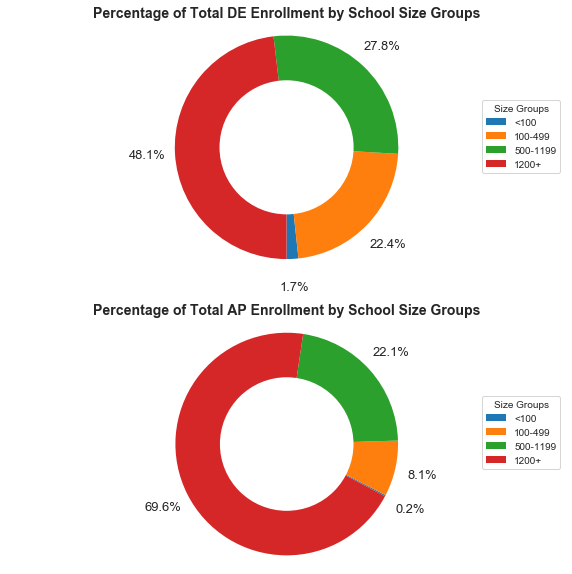

In [43]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = size_enrollments.plot.pie(y = 'Total DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -90, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = size_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Size Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Size Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = size_enrollments.plot.pie(y = 'Total AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -28, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = size_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Size Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Size Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

### -- By Ethnicity %

In [44]:
eth_total_enrollment = crdc_1516_cleaned.groupby('eth_quintile')['total_enrollment'].sum().rename('Total')
eth_hs_total_enrollment = crdc_1516_cleaned.groupby('eth_quintile')['hs_total_enrollment'].sum().rename('HS Total') # Based on the Averager Function

eth_deOffering_total_enrollment = crdc_1516_deYes.groupby('eth_quintile')['total_enrollment'].sum().rename('DE-Yes Total')
eth_deOffering_hs_enrollment = crdc_1516_deYes.groupby('eth_quintile')['hs_total_enrollment'].sum().rename('DE-Yes HS') # Based on the Averager Function

eth_apOffering_total_enrollment = crdc_1516_apYes.groupby('eth_quintile')['total_enrollment'].sum().rename('AP-Yes Total')
eth_apOffering_hs_enrollment = crdc_1516_apYes.groupby('eth_quintile')['hs_total_enrollment'].sum().rename('AP-Yes HS') # Based on the Averager Function

eth_de_total_enrollment = crdc_1516_deYes.groupby('eth_quintile')['de_total_enrollment'].sum().rename('Total DE Students')
eth_ap_total_enrollment = crdc_1516_apYes.groupby('eth_quintile')['ap_total_enrollment'].sum().rename('Total AP Students')

eth_enrollments = pd.concat([eth_apOffering_total_enrollment, eth_apOffering_hs_enrollment,
           eth_deOffering_total_enrollment, eth_deOffering_hs_enrollment,
           eth_total_enrollment, eth_hs_total_enrollment,
           eth_de_total_enrollment, eth_ap_total_enrollment], axis = 1)
eth_enrollments.rename({1:'0-20%', 2:'21-40%', 3:'41-60%', 4:'61-80%', 5:'81-100%'})

,AP-Yes Total,AP-Yes HS,DE-Yes Total,DE-Yes HS,Total,HS Total,Total DE Students,Total AP Students
eth_quintile,,,,,,,,
0-20%,3229567,2980472,3233126,2908875,11505482,3651534,415003,571383
21-40%,3006253,2806717,2689506,2488092,10283523,3160468,291684,656437
41-60%,2473886,2335908,2045943,1926403,8464867,2589481,179446,564997
61-80%,1907326,1820526,1441606,1375589,6742055,2057750,131835,416520
81-100%,3223795,3026368,2281001,2140372,13578549,3581029,162086,599449


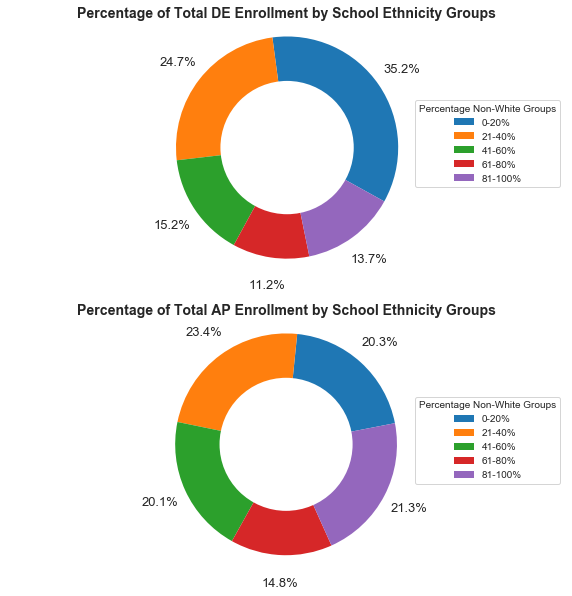

In [45]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = eth_enrollments.plot.pie(y = 'Total DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -29, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Ethnicity Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = eth_enrollments.plot.pie(y = 'Total AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = 11, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Ethnicity Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

### -- By Gender

In [46]:
total_m = crdc_1516_cleaned['TOT_ENR_M'].sum()
total_hs_m = crdc_1516_cleaned['hs_male'].sum()
deOffering_total_m = crdc_1516_deYes['TOT_ENR_M'].sum()
deOffering_total_hs_m = crdc_1516_deYes['hs_male'].sum()
apOffering_total_m = crdc_1516_apYes['TOT_ENR_M'].sum()
apOffering_total_hs_m = crdc_1516_apYes['hs_male'].sum()
total_apEnr_m = crdc_1516_apYes['TOT_APENR_M'].sum()
total_dualEnr_m = crdc_1516_deYes['TOT_DUALENR_M'].sum()

total_f = crdc_1516_cleaned['TOT_ENR_F'].sum()
total_hs_f = crdc_1516_cleaned['hs_female'].sum()
deOffering_total_f = crdc_1516_deYes['TOT_ENR_F'].sum()
deOffering_total_hs_f = crdc_1516_deYes['hs_female'].sum() 
apOffering_total_f = crdc_1516_apYes['TOT_ENR_F'].sum()
apOffering_total_hs_f = crdc_1516_apYes['hs_female'].sum()
total_apEnr_f = crdc_1516_apYes['TOT_APENR_F'].sum()
total_dualEnr_f = crdc_1516_deYes['TOT_DUALENR_F'].sum()

gender_order = ['AP-Yes Total', 'AP-Yes HS', 'DE-Yes Total', 'DE-Yes HS',
                  'Total', 'HS Total', 'Total DE Students', 'Total AP Students']
gender_enrollments = pd.DataFrame({'AP-Yes Total': [apOffering_total_m, apOffering_total_f], 
                                 'AP-Yes HS': [apOffering_total_hs_m, apOffering_total_hs_f],
                                 'DE-Yes Total': [deOffering_total_m, deOffering_total_f], 
                                 'DE-Yes HS': [deOffering_total_hs_m, deOffering_total_hs_f],
                                 'Total': [total_m, total_f],
                                 'HS Total': [total_hs_m, total_hs_f],
                                 'Total DE Students': [total_dualEnr_m, total_dualEnr_f],
                                 'Total AP Students': [total_apEnr_m, total_apEnr_f]},
                index = ['Male', 'Female'], dtype=int)[gender_order]
gender_enrollments

,AP-Yes Total,AP-Yes HS,DE-Yes Total,DE-Yes HS,Total,HS Total,Total DE Students,Total AP Students
Male,7038270,6606458,5956484,5528184,25995405,7702684,536812,1229700
Female,6802557,6363538,5734698,5311155,24579071,7337582,643242,1579086


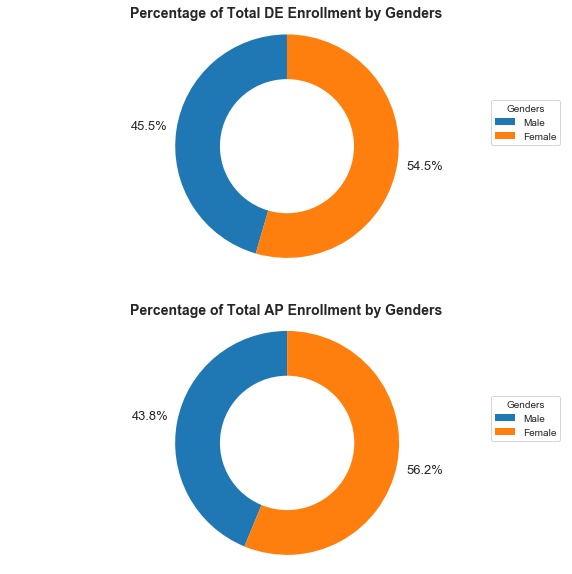

In [47]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = gender_enrollments.plot.pie(y = 'Total DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = 90, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = gender_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Genders',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Genders')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = gender_enrollments.plot.pie(y = 'Total AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = 90, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = gender_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Genders',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Genders')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

### -- By Race

In [48]:
total_hi = crdc_1516_cleaned['total_hi_enrollment'].sum()
total_hs_hi = crdc_1516_cleaned['hs_hi'].sum()
deOffering_total_hi = crdc_1516_deYes['total_hi_enrollment'].sum()
deOffering_total_hs_hi = crdc_1516_deYes['hs_hi'].sum()
apOffering_total_hi = crdc_1516_apYes['total_hi_enrollment'].sum()
apOffering_total_hs_hi = crdc_1516_apYes['hs_hi'].sum()
total_dualEnr_hi = crdc_1516_deYes['de_hi_enrollment'].sum()
total_apEnr_hi = crdc_1516_apYes['ap_hi_enrollment'].sum()

total_am = crdc_1516_cleaned['total_am_enrollment'].sum()
total_hs_am = crdc_1516_cleaned['hs_am'].sum()
deOffering_total_am = crdc_1516_deYes['total_am_enrollment'].sum()
deOffering_total_hs_am = crdc_1516_deYes['hs_am'].sum()
apOffering_total_am = crdc_1516_apYes['total_am_enrollment'].sum()
apOffering_total_hs_am = crdc_1516_apYes['hs_am'].sum()
total_dualEnr_am = crdc_1516_deYes['de_am_enrollment'].sum()
total_apEnr_am = crdc_1516_apYes['ap_am_enrollment'].sum()

total_as = crdc_1516_cleaned['total_as_enrollment'].sum()
total_hs_as = crdc_1516_cleaned['hs_as'].sum()
deOffering_total_as = crdc_1516_deYes['total_as_enrollment'].sum()
deOffering_total_hs_as = crdc_1516_deYes['hs_as'].sum()
apOffering_total_as = crdc_1516_apYes['total_as_enrollment'].sum()
apOffering_total_hs_as = crdc_1516_apYes['hs_as'].sum()
total_dualEnr_as = crdc_1516_deYes['de_as_enrollment'].sum()
total_apEnr_as = crdc_1516_apYes['ap_as_enrollment'].sum()

total_bl = crdc_1516_cleaned['total_bl_enrollment'].sum()
total_hs_bl = crdc_1516_cleaned['hs_bl'].sum()
deOffering_total_bl = crdc_1516_deYes['total_bl_enrollment'].sum()
deOffering_total_hs_bl = crdc_1516_deYes['hs_bl'].sum()
apOffering_total_bl = crdc_1516_apYes['total_bl_enrollment'].sum()
apOffering_total_hs_bl = crdc_1516_apYes['hs_bl'].sum()
total_dualEnr_bl = crdc_1516_deYes['de_bl_enrollment'].sum()
total_apEnr_bl = crdc_1516_apYes['ap_bl_enrollment'].sum()

total_hp = crdc_1516_cleaned['total_hp_enrollment'].sum()
total_hs_hp = crdc_1516_cleaned['hs_hp'].sum()
deOffering_total_hp = crdc_1516_deYes['total_hp_enrollment'].sum()
deOffering_total_hs_hp = crdc_1516_deYes['hs_hp'].sum()
apOffering_total_hp = crdc_1516_apYes['total_hp_enrollment'].sum()
apOffering_total_hs_hp = crdc_1516_apYes['hs_hp'].sum()
total_dualEnr_hp = crdc_1516_deYes['de_hp_enrollment'].sum()
total_apEnr_hp = crdc_1516_apYes['ap_hp_enrollment'].sum()

total_tr = crdc_1516_cleaned['total_tr_enrollment'].sum()
total_hs_tr = crdc_1516_cleaned['hs_tr'].sum()
deOffering_total_tr = crdc_1516_deYes['total_tr_enrollment'].sum()
deOffering_total_hs_tr = crdc_1516_deYes['hs_tr'].sum()
apOffering_total_tr = crdc_1516_apYes['total_tr_enrollment'].sum()
apOffering_total_hs_tr = crdc_1516_apYes['hs_tr'].sum()
total_dualEnr_tr = crdc_1516_deYes['de_tr_enrollment'].sum()
total_apEnr_tr = crdc_1516_apYes['ap_tr_enrollment'].sum()

total_wh = crdc_1516_cleaned['total_white_enrollment'].sum()
total_hs_wh = crdc_1516_cleaned['hs_white'].sum()
deOffering_total_wh = crdc_1516_deYes['total_white_enrollment'].sum()
deOffering_total_hs_wh = crdc_1516_deYes['hs_white'].sum()
apOffering_total_wh = crdc_1516_apYes['total_white_enrollment'].sum()
apOffering_total_hs_wh = crdc_1516_apYes['hs_white'].sum()
total_dualEnr_wh = crdc_1516_deYes['de_white_enrollment'].sum()
total_apEnr_wh = crdc_1516_apYes['ap_white_enrollment'].sum()

race_order = ['AP-Yes Total', 'AP-Yes HS', 'DE-Yes Total', 'DE-Yes HS',
                  'Total', 'HS Total', 'Total DE Students', 'Total AP Students']
race_enrollment = pd.DataFrame({'AP-Yes Total': [apOffering_total_hi, apOffering_total_am, apOffering_total_as,
                               apOffering_total_bl, apOffering_total_hp, apOffering_total_tr, apOffering_total_wh], 
             'AP-Yes HS': [apOffering_total_hs_hi, apOffering_total_hs_am, apOffering_total_hs_as,
                          apOffering_total_hs_bl, apOffering_total_hs_hp, apOffering_total_hs_tr, apOffering_total_hs_wh],
             'DE-Yes Total': [deOffering_total_hi, deOffering_total_am, deOffering_total_as,
                              deOffering_total_bl, deOffering_total_hp, deOffering_total_tr, deOffering_total_wh], 
             'DE-Yes HS': [deOffering_total_hs_hi, deOffering_total_hs_am, deOffering_total_hs_as, 
                          deOffering_total_hs_bl, deOffering_total_hs_hp, deOffering_total_hs_tr, deOffering_total_hs_wh],
             'Total': [total_hi, total_am, total_as,
                      total_bl, total_hp, total_tr, total_wh],
             'HS Total': [total_hs_hi, total_hs_am, total_hs_as,
                         total_hs_bl, total_hs_hp, total_hs_tr, total_hs_wh],
             'Total DE Students': [total_dualEnr_hi, total_dualEnr_am, total_dualEnr_as,
                                  total_dualEnr_bl, total_dualEnr_hp, total_dualEnr_tr, total_dualEnr_wh],
             'Total AP Students': [total_apEnr_hi, total_apEnr_am, total_apEnr_as,
                                  total_apEnr_bl, total_apEnr_hp, total_apEnr_tr, total_apEnr_wh]},
                index = ['Hispanic', 'American Indian/Alaska Native', 'Asian', 'Black', 
                         'Hawaiian Native/Pacific Islander', 'Two or More Races', 'White'], dtype=int)[race_order]
race_enrollment

,AP-Yes Total,AP-Yes HS,DE-Yes Total,DE-Yes HS,Total,HS Total,Total DE Students,Total AP Students
Hispanic,3367784,3188384,2460264,2326966,13034801,3631028,199014,600303
American Indian/Alaska Native,123272,115549,125366,110312,558109,165225,11675,17674
Asian,751709,717582,515911,494569,2519393,765762,59970,300185
Black,2106157,1957713,1777223,1652738,7805899,2327197,104655,264958
Hawaiian Native/Pacific Islander,59846,55470,49060,44171,218485,63378,4246,10056
Two or More Races,396959,370429,331681,306898,1759359,425955,31956,81973
White,7035100,6565417,6431677,5904451,24678430,7662702,768538,1533637


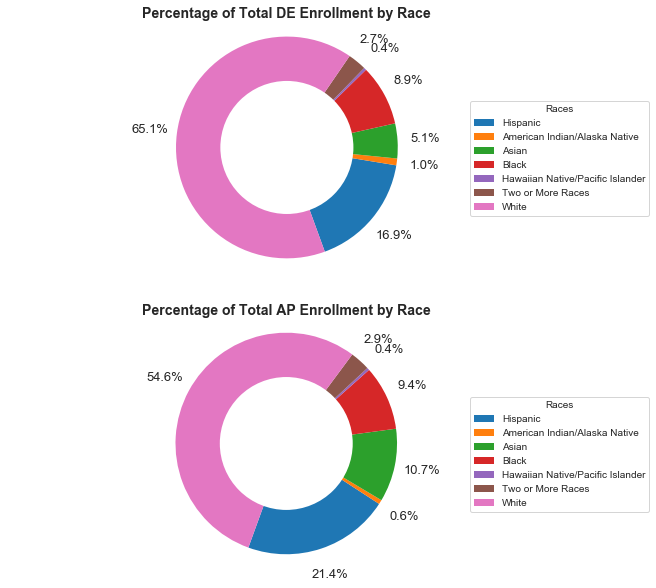

In [49]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = race_enrollment.plot.pie(y = 'Total DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(race_enrollment))],
                        startangle = -70, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = race_enrollment.index,
           bbox_to_anchor = (.82,0.71), title = 'Races',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Race')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = race_enrollment.plot.pie(y = 'Total AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(race_enrollment))],
                        startangle = -110, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = race_enrollment.index,
           bbox_to_anchor = (.82,0.71), title = 'Races',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Race')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

### -- By LEP/IDEA

In [50]:
total_lep = crdc_1516_cleaned['total_lep_enrollment'].sum()
total_hs_lep = crdc_1516_cleaned['hs_lep'].sum()
deOffering_total_lep = crdc_1516_deYes['total_lep_enrollment'].sum()
deOffering_total_hs_lep = crdc_1516_deYes['hs_lep'].sum()
apOffering_total_lep = crdc_1516_apYes['total_lep_enrollment'].sum()
apOffering_total_hs_lep = crdc_1516_apYes['hs_lep'].sum()
total_dualEnr_lep = crdc_1516_deYes['de_lep_enrollment'].sum()
total_apEnr_lep = crdc_1516_apYes['ap_lep_enrollment'].sum()

total_idea = crdc_1516_cleaned['total_idea_enrollment'].sum()
total_hs_idea = crdc_1516_cleaned['hs_idea'].sum()
deOffering_total_idea = crdc_1516_deYes['total_idea_enrollment'].sum()
deOffering_total_hs_idea = crdc_1516_deYes['hs_idea'].sum()
apOffering_total_idea = crdc_1516_apYes['total_idea_enrollment'].sum()
apOffering_total_hs_idea = crdc_1516_apYes['hs_idea'].sum()
total_dualEnr_idea = crdc_1516_deYes['de_idea_enrollment'].sum()
total_apEnr_idea = crdc_1516_apYes['ap_idea_enrollment'].sum()

lep_order = ['AP-Yes Total', 'AP-Yes HS', 'DE-Yes Total', 'DE-Yes HS',
                  'Total', 'HS Total', 'Total DE Students', 'Total AP Students']

pd.DataFrame({'AP-Yes Total': [apOffering_total_lep, apOffering_total_idea], 
                                 'AP-Yes HS': [apOffering_total_hs_lep, apOffering_total_hs_idea],
                                 'DE-Yes Total': [deOffering_total_lep, deOffering_total_idea], 
                                 'DE-Yes HS': [deOffering_total_hs_lep, deOffering_total_hs_idea],
                                 'Total': [total_lep, total_idea],
                                 'HS Total': [total_hs_lep, total_hs_idea],
                                 'Total DE Students': [total_dualEnr_lep, total_dualEnr_idea],
                                 'Total AP Students': [total_apEnr_lep, total_apEnr_idea]},
                index = ['LEP', 'IDEA'], dtype=int)[lep_order]

,AP-Yes Total,AP-Yes HS,DE-Yes Total,DE-Yes HS,Total,HS Total,Total DE Students,Total AP Students
LEP,772909,727215,570212,532216,5121645,846086,22319,53452
IDEA,1593913,1490279,1347815,1242054,6352285,1806702,44931,43853


## State

In [51]:
state_total_enrollment = crdc_1516_cleaned.groupby('LEA_STATE')['total_enrollment'].sum().rename('Total')
state_hs_total_enrollment = crdc_1516_cleaned.groupby('LEA_STATE')['hs_total_enrollment'].sum().rename('HS Total') # Based on the Averager Function

state_deOffering_total_enrollment = crdc_1516_deYes.groupby('LEA_STATE')['total_enrollment'].sum().rename('DE-Yes Total')
state_deOffering_hs_enrollment = crdc_1516_deYes.groupby('LEA_STATE')['hs_total_enrollment'].sum().rename('DE-Yes HS') # Based on the Averager Function

state_apOffering_total_enrollment = crdc_1516_apYes.groupby('LEA_STATE')['total_enrollment'].sum().rename('AP-Yes Total')
state_apOffering_hs_enrollment = crdc_1516_apYes.groupby('LEA_STATE')['hs_total_enrollment'].sum().rename('AP-Yes HS') # Based on the Averager Function

state_de_total_enrollment = crdc_1516_deYes.groupby('LEA_STATE')['de_total_enrollment'].sum().rename('Total DE Students')
state_ap_total_enrollment = crdc_1516_apYes.groupby('LEA_STATE')['ap_total_enrollment'].sum().rename('Total AP Students')

pd.concat([state_apOffering_total_enrollment, state_apOffering_hs_enrollment,
           state_deOffering_total_enrollment, state_deOffering_hs_enrollment,
           state_total_enrollment, state_hs_total_enrollment,
           state_de_total_enrollment, state_ap_total_enrollment], axis = 1) 

,AP-Yes Total,AP-Yes HS,DE-Yes Total,DE-Yes HS,Total,HS Total,Total DE Students,Total AP Students
LEA_STATE,,,,,,,,
AK,31113,26828,31092,22963,132342,38487,2120,4308
AL,197786,178366,230650,188556,746839,223999,11002,31166
AR,140973,126940,109572,98965,485821,142914,13636,30370
AZ,292471,272329,227141,215207,1134663,337325,31460,51166
CA,1808848,1714293,719408,660474,6282366,1917427,34746,425288
CO,243486,220964,247686,221649,901978,263055,19233,53962
CT,156361,149492,110903,108358,537516,167248,15329,33033
DC,16767,14614,3123,2955,82585,17935,71,4183
DE,37292,33481,30821,28577,139175,41867,1820,6595


## Regional

In [52]:
region_total_enrollment = crdc_1516_cleaned.groupby('region_accred')['total_enrollment'].sum().rename('Total')
region_hs_total_enrollment = crdc_1516_cleaned.groupby('region_accred')['hs_total_enrollment'].sum().rename('HS Total') # Based on the Averager Function

region_deOffering_total_enrollment = crdc_1516_deYes.groupby('region_accred')['total_enrollment'].sum().rename('DE-Yes Total')
region_deOffering_hs_enrollment = crdc_1516_deYes.groupby('region_accred')['hs_total_enrollment'].sum().rename('DE-Yes HS') # Based on the Averager Function

region_apOffering_total_enrollment = crdc_1516_apYes.groupby('region_accred')['total_enrollment'].sum().rename('AP-Yes Total')
region_apOffering_hs_enrollment = crdc_1516_apYes.groupby('region_accred')['hs_total_enrollment'].sum().rename('AP-Yes HS') # Based on the Averager Function

region_de_total_enrollment = crdc_1516_deYes.groupby('region_accred')['de_total_enrollment'].sum().rename('Total DE Students')
region_ap_total_enrollment = crdc_1516_apYes.groupby('region_accred')['ap_total_enrollment'].sum().rename('Total AP Students')

region_enrollment = pd.concat([region_apOffering_total_enrollment, region_apOffering_hs_enrollment,
           region_deOffering_total_enrollment, region_deOffering_hs_enrollment,
           region_total_enrollment, region_hs_total_enrollment,
           region_de_total_enrollment, region_ap_total_enrollment], axis = 1) 
region_enrollment

,AP-Yes Total,AP-Yes HS,DE-Yes Total,DE-Yes HS,Total,HS Total,Total DE Students,Total AP Students
region_accred,,,,,,,,
HLC,3706766,3477413,3790713,3496639,14562527,4350828,473203,696590
MSCHE,2055157,1887268,1392648,1297766,6950581,2109975,149369,395442
NEASC,612898,573966,375873,352424,2079413,634794,27202,114292
NWCCU,908245,820224,747784,685739,3387504,1011777,130366,170835
SACS,4697432,4448844,4607622,4296080,17129172,4964879,362419,999657
WASC,1860329,1762276,776542,710683,6465279,1968009,37495,431970


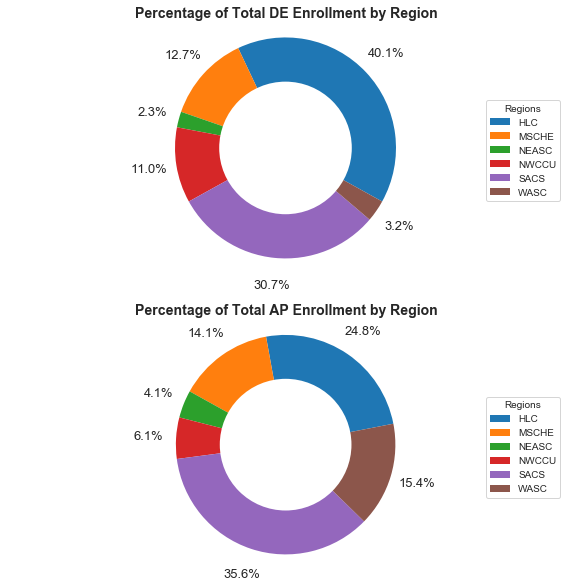

In [53]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = region_enrollment.plot.pie(y = 'Total DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -29, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = region_enrollment.index,
           bbox_to_anchor = (1,0.71), title = 'Regions',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Region')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = region_enrollment.plot.pie(y = 'Total AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = 11, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = region_enrollment.index,
           bbox_to_anchor = (1,0.71), title = 'Regions',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Region')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

# <div class = 'alert alert-cell alert-info'>2. Ratios</dvi>

## National

### -- By Gender

In [54]:
de_pct_m = round(total_dualEnr_m / (de_total_enrollment) * 100, 1)
de_pct_f = round(total_dualEnr_f / (de_total_enrollment) * 100, 1)

ap_pct_m = round(total_apEnr_m / (ap_total_enrollment) * 100, 1)
ap_pct_f = round(total_apEnr_f / (ap_total_enrollment) * 100, 1)

deOffering_pct_m = round(deOffering_total_m / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_f = round(deOffering_total_f / (deOffering_total_enrollment) * 100, 1)

apOffering_pct_m = round(apOffering_total_m / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_f = round(apOffering_total_f / (apOffering_total_enrollment) * 100, 1)

de_gender_stats = pd.DataFrame({'Out of All Students in DE-Yes': [deOffering_pct_m, deOffering_pct_f],
                                'Out of DE-Students': [de_pct_m, de_pct_f]}, 
                                index = ['Male', 'Female'])
ap_gender_stats = pd.DataFrame({'Out of All Students in AP-Yes': [apOffering_pct_m, apOffering_pct_f],
                                'Out of AP-Students': [ap_pct_m, ap_pct_f]}, 
                                index = ['Male', 'Female'])

In [55]:
gender_order = ['Out of All Students in DE-Yes','Out of DE-Students','Out of All Students in AP-Yes', 'Out of AP-Students']
display(pd.concat([de_gender_stats, ap_gender_stats], axis = 1)[gender_order])
print('Reads like:  Males make up ' + str(deOffering_pct_m) + '% of All students (in schools that offer DE), and',
         str(de_pct_m) + '% of students enrolled in DE courses.')
print('And: Males make up ' + str(apOffering_pct_m) + '% of All students (in schools that offer AP), and',
         str(ap_pct_m) + '% of students enrolled in AP courses.')

,Out of All Students in DE-Yes,Out of DE-Students,Out of All Students in AP-Yes,Out of AP-Students
Male,50.9,45.5,50.9,43.8
Female,49.1,54.5,49.1,56.2


Reads like:  Males make up 50.9% of All students (in schools that offer DE), and 45.5% of students enrolled in DE courses.
And: Males make up 50.9% of All students (in schools that offer AP), and 43.8% of students enrolled in AP courses.


### -- By Race

In [56]:
de_pct_hi = round(total_dualEnr_hi / (de_total_enrollment) * 100, 1)
de_pct_am = round(total_dualEnr_am / (de_total_enrollment) * 100, 1)
de_pct_as = round(total_dualEnr_as / (de_total_enrollment) * 100, 1)
de_pct_bl = round(total_dualEnr_bl / (de_total_enrollment) * 100, 1)
de_pct_hp = round(total_dualEnr_hp / (de_total_enrollment) * 100, 1)
de_pct_tr = round(total_dualEnr_tr / (de_total_enrollment) * 100, 1)
de_pct_wh = round(total_dualEnr_wh / (de_total_enrollment) * 100, 1)

ap_pct_hi = round(total_apEnr_hi / (ap_total_enrollment) * 100, 1)
ap_pct_am = round(total_apEnr_am / (ap_total_enrollment) * 100, 1)
ap_pct_as = round(total_apEnr_as / (ap_total_enrollment) * 100, 1)
ap_pct_bl = round(total_apEnr_bl / (ap_total_enrollment) * 100, 1)
ap_pct_hp = round(total_apEnr_hp / (ap_total_enrollment) * 100, 1)
ap_pct_tr = round(total_apEnr_tr / (ap_total_enrollment) * 100, 1)
ap_pct_wh = round(total_apEnr_wh / (ap_total_enrollment) * 100, 1)

deOffering_pct_hi = round(deOffering_total_hi / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_am = round(deOffering_total_am / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_as = round(deOffering_total_as / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_bl = round(deOffering_total_bl / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_hp = round(deOffering_total_hp / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_tr = round(deOffering_total_tr / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_wh = round(deOffering_total_wh / (deOffering_total_enrollment) * 100, 1)

apOffering_pct_hi = round(apOffering_total_hi / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_am = round(apOffering_total_am / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_as = round(apOffering_total_as / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_bl = round(apOffering_total_bl / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_hp = round(apOffering_total_hp / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_tr = round(apOffering_total_tr / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_wh = round(apOffering_total_wh / (apOffering_total_enrollment) * 100, 1)

In [57]:
de_race_stats = pd.DataFrame(data = [[deOffering_pct_hi, de_pct_hi], 
                                    [deOffering_pct_am, de_pct_am], 
                                    [deOffering_pct_as, de_pct_as], 
                                    [deOffering_pct_bl, de_pct_bl], 
                                    [deOffering_pct_hp, de_pct_hp],
                                    [deOffering_pct_tr, de_pct_tr], 
                                    [deOffering_pct_wh, de_pct_wh]], 
                            index = ['Hispanic', 'Native American', 'Asian', 'Black', 'Native Hawaiian', 
                                        'Two or More Races', 'White'],
                            columns = ['Out of All Students in DE-Yes', 'Out of DE-Students'])
ap_race_stats = pd.DataFrame(data = [[apOffering_pct_hi, ap_pct_hi], 
                                    [apOffering_pct_am, ap_pct_am], 
                                    [apOffering_pct_as, ap_pct_as], 
                                    [apOffering_pct_bl, ap_pct_bl], 
                                    [apOffering_pct_hp, ap_pct_hp],
                                    [apOffering_pct_tr, ap_pct_tr], 
                                    [apOffering_pct_wh, ap_pct_wh]], 
                            index = ['Hispanic', 'Native American', 'Asian', 'Black', 'Native Hawaiian', 
                                        'Two or More Races', 'White'],
                            columns = ['Out of All Students in AP-Yes', 'Out of AP-Students'])

In [58]:
display(pd.concat([de_race_stats, ap_race_stats], axis=1))
print('Reads like:  Hispanics make up ' + str(deOffering_pct_hi) + '% of All students (in schools that offer DE), and',
         str(de_pct_hi) + '% of students enrolled in DE courses.')
print('And: Hispanics make up ' + str(apOffering_pct_hi) + '% of All students (in schools that offer AP), and',
         str(ap_pct_hi) + '% of students enrolled in AP courses.')

,Out of All Students in DE-Yes,Out of DE-Students,Out of All Students in AP-Yes,Out of AP-Students
Hispanic,21.0,16.9,24.3,21.4
Native American,1.1,1.0,0.9,0.6
Asian,4.4,5.1,5.4,10.7
Black,15.2,8.9,15.2,9.4
Native Hawaiian,0.4,0.4,0.4,0.4
Two or More Races,2.8,2.7,2.9,2.9
White,55.0,65.1,50.8,54.6


Reads like:  Hispanics make up 21.0% of All students (in schools that offer DE), and 16.9% of students enrolled in DE courses.
And: Hispanics make up 24.3% of All students (in schools that offer AP), and 21.4% of students enrolled in AP courses.


### -- By LEP/IDEA

In [59]:
de_pct_lep = round(total_dualEnr_lep / (de_total_enrollment) * 100, 1)
de_pct_idea = round(total_dualEnr_idea / (de_total_enrollment) * 100, 1)

ap_pct_lep = round(total_apEnr_lep / (ap_total_enrollment) * 100, 1)
ap_pct_idea = round(total_apEnr_idea / (ap_total_enrollment) * 100, 1)

deOffering_pct_lep = round(deOffering_total_lep / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_idea = round(deOffering_total_idea / (deOffering_total_enrollment) * 100, 1)

apOffering_pct_lep = round(apOffering_total_lep / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_idea = round(apOffering_total_idea / (apOffering_total_enrollment) * 100, 1)

In [60]:
de_lep_idea_stats = pd.DataFrame({'Out of All Students in DE-Yes': [deOffering_pct_lep, deOffering_pct_idea],
                                'Out of DE-Students': [de_pct_lep, de_pct_idea]},
                             index=['LEP', 'IDEA'])
ap_lep_idea_stats = pd.DataFrame({'Out of All Students in AP-Yes': [apOffering_pct_lep, apOffering_pct_idea],
                                'Out of AP-Students': [ap_pct_lep, ap_pct_idea]},
                             index=['LEP', 'IDEA'])

In [61]:
lep_idea_order = ['Out of All Students in DE-Yes', 'Out of DE-Students', 'Out of All Students in AP-Yes', 'Out of AP-Students',]
display(pd.concat([de_lep_idea_stats, ap_lep_idea_stats], axis=1)[lep_idea_order])
print('Reads like:  LEP Students make up ' + str(deOffering_pct_lep) + '% of All students (in schools that offer DE), and',
         str(de_pct_lep) + '% of students enrolled in DE courses.')
print('And: LEP Students make up ' + str(apOffering_pct_lep) + '% of All students (in schools that offer AP), and',
         str(ap_pct_lep) + '% of students enrolled in AP courses.')

,Out of All Students in DE-Yes,Out of DE-Students,Out of All Students in AP-Yes,Out of AP-Students
LEP,4.9,1.9,5.6,1.9
IDEA,11.5,3.8,11.5,1.6


Reads like:  LEP Students make up 4.9% of All students (in schools that offer DE), and 1.9% of students enrolled in DE courses.
And: LEP Students make up 5.6% of All students (in schools that offer AP), and 1.9% of students enrolled in AP courses.


## State

### -- By Gender

*How underrepresented are males in each state?*

In [62]:
de_state_male = crdc_1516_deYes.groupby(['LEA_STATE'])['TOT_DUALENR_M'].sum()
de_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['de_total_enrollment'].sum()

deOffering_state_male = crdc_1516_deYes.groupby(['LEA_STATE'])['TOT_ENR_M'].sum()
deOffering_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

de_state_male_stats = pd.DataFrame([de_state_male, de_state_total]).T
deOffering_state_male_stats = pd.DataFrame([deOffering_state_male, deOffering_state_total]).T

de_state_male_stats['TOT_DUALENR_M'] = round(de_state_male_stats['TOT_DUALENR_M'] / de_state_male_stats['de_total_enrollment'] * 100, 1)
de_state_male_stats.drop('de_total_enrollment', axis = 1, inplace = True)

deOffering_state_male_stats['TOT_ENR_M'] = round(deOffering_state_male_stats['TOT_ENR_M'] / deOffering_state_male_stats['total_enrollment'] * 100, 1)
deOffering_state_male_stats.drop('total_enrollment', axis = 1, inplace = True)

deOffering_state_male_stats = deOffering_state_male_stats.rename({'TOT_ENR_M':'Pct Male in de-Yes'}, axis = 'columns')
de_state_male_stats = de_state_male_stats.rename({'TOT_DUALENR_M':'Pct Male de-Students'}, axis = 'columns')

"""Join the two DataFrames"""
de_state_male_stats_final = deOffering_state_male_stats.join(de_state_male_stats, how = 'inner')

de_state_male_stats_final['DE Male Gap'] = de_state_male_stats_final['Pct Male de-Students'] - de_state_male_stats_final['Pct Male in de-Yes']

In [63]:
ap_state_male = crdc_1516_apYes.groupby(['LEA_STATE'])['TOT_APENR_M'].sum()
ap_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_total_enrollment'].sum()

apOffering_state_male = crdc_1516_apYes.groupby(['LEA_STATE'])['TOT_ENR_M'].sum()
apOffering_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

ap_state_male_stats = pd.DataFrame([ap_state_male, ap_state_total]).T
apOffering_state_male_stats = pd.DataFrame([apOffering_state_male, apOffering_state_total]).T

ap_state_male_stats['TOT_APENR_M'] = round(ap_state_male_stats['TOT_APENR_M'] / ap_state_male_stats['ap_total_enrollment'] * 100, 1)
ap_state_male_stats.drop('ap_total_enrollment', axis = 1, inplace = True)

apOffering_state_male_stats['TOT_ENR_M'] = round(apOffering_state_male_stats['TOT_ENR_M'] / apOffering_state_male_stats['total_enrollment'] * 100, 1)
apOffering_state_male_stats.drop('total_enrollment', axis = 1, inplace = True)

apOffering_state_male_stats = apOffering_state_male_stats.rename({'TOT_ENR_M':'Pct Male in ap-Yes'}, axis = 'columns')
ap_state_male_stats = ap_state_male_stats.rename({'TOT_APENR_M':'Pct Male ap-Students'}, axis = 'columns')

"""Join the two DataFrames"""
ap_state_male_stats_final = apOffering_state_male_stats.join(ap_state_male_stats, how = 'inner')

ap_state_male_stats_final['AP Male Gap'] = ap_state_male_stats_final['Pct Male ap-Students'] - ap_state_male_stats_final['Pct Male in ap-Yes']

In [64]:
display(pd.concat([de_state_male_stats_final, ap_state_male_stats_final], axis = 1))
print('The more negative the Male Gap the more underrepresented the Male Students are in that State')

,Pct Male in de-Yes,Pct Male de-Students,DE Male Gap,Pct Male in ap-Yes,Pct Male ap-Students,AP Male Gap
LEA_STATE,,,,,,
AK,52.3,50.0,-2.3,52.0,43.5,-8.5
AL,51.0,44.1,-6.9,50.8,41.9,-8.9
AR,50.8,43.8,-7.0,50.9,42.4,-8.5
AZ,50.8,45.9,-4.9,50.8,43.4,-7.4
CA,50.8,46.3,-4.5,50.8,43.3,-7.5
CO,50.9,46.0,-4.9,51.0,44.3,-6.7
CT,51.5,46.6,-4.9,50.5,42.6,-7.9
DC,46.9,35.2,-11.7,49.6,42.0,-7.6
DE,50.5,38.9,-11.6,51.0,42.4,-8.6


The more negative the Male Gap the more underrepresented the Male Students are in that State


### -- By Minority

*How underrepresented are non-whites in each state?*

In [65]:
de_state_nonwhite = crdc_1516_deYes.groupby(['LEA_STATE'])['de_nonwhite_enrollment'].sum()
de_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['de_total_enrollment'].sum()

deOffering_state_nonwhite = crdc_1516_deYes.groupby(['LEA_STATE'])['total_nonwhite_enrollment'].sum()
deOffering_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

de_state_stats = pd.DataFrame([de_state_nonwhite, de_state_total]).T
deOffering_state_stats = pd.DataFrame([deOffering_state_nonwhite, deOffering_state_total]).T

de_state_stats['de_nonwhite_enrollment'] = round(de_state_stats['de_nonwhite_enrollment'] / de_state_stats['de_total_enrollment'] * 100, 1)
de_state_stats.drop('de_total_enrollment', axis = 1, inplace = True)

deOffering_state_stats['total_nonwhite_enrollment'] = round(deOffering_state_stats['total_nonwhite_enrollment'] / deOffering_state_stats['total_enrollment'] * 100, 1)
deOffering_state_stats.drop('total_enrollment', axis = 1, inplace = True)

deOffering_state_stats = deOffering_state_stats.rename({'total_nonwhite_enrollment':'Pct Non-White in de-Yes'}, axis = 'columns')
de_state_stats = de_state_stats.rename({'de_nonwhite_enrollment':'Pct Non-White de-Students'}, axis = 'columns')

"""Join the two DataFrames"""
de_state_stats_final = deOffering_state_stats.join(de_state_stats, how = 'inner')

de_state_stats_final['DE Non-White Gap'] = de_state_stats_final['Pct Non-White de-Students'] - de_state_stats_final['Pct Non-White in de-Yes']

In [66]:
ap_state_nonwhite = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_nonwhite_enrollment'].sum()
ap_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_total_enrollment'].sum()

apOffering_state_nonwhite = crdc_1516_apYes.groupby(['LEA_STATE'])['total_nonwhite_enrollment'].sum()
apOffering_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

ap_state_stats = pd.DataFrame([ap_state_nonwhite, ap_state_total]).T
apOffering_state_stats = pd.DataFrame([apOffering_state_nonwhite, apOffering_state_total]).T

ap_state_stats['ap_nonwhite_enrollment'] = round(ap_state_stats['ap_nonwhite_enrollment'] / ap_state_stats['ap_total_enrollment'] * 100, 1)
ap_state_stats.drop('ap_total_enrollment', axis = 1, inplace = True)

apOffering_state_stats['total_nonwhite_enrollment'] = round(apOffering_state_stats['total_nonwhite_enrollment'] / apOffering_state_stats['total_enrollment'] * 100, 1)
apOffering_state_stats.drop('total_enrollment', axis = 1, inplace = True)

apOffering_state_stats = apOffering_state_stats.rename({'total_nonwhite_enrollment':'Pct Non-White in ap-Yes'}, axis = 'columns')
ap_state_stats = ap_state_stats.rename({'ap_nonwhite_enrollment':'Pct Non-White ap-Students'}, axis = 'columns')

"""Join the two DataFrames"""
ap_state_stats_final = apOffering_state_stats.join(ap_state_stats, how = 'inner')

ap_state_stats_final['AP Non-White Gap'] = ap_state_stats_final['Pct Non-White ap-Students'] - ap_state_stats_final['Pct Non-White in ap-Yes']

In [67]:
display(pd.concat([de_state_stats_final, ap_state_stats_final], axis = 1))
print('The more negative the Non-White Gap the more underrepresented the Non-White Students are in that State')

,Pct Non-White in de-Yes,Pct Non-White de-Students,DE Non-White Gap,Pct Non-White in ap-Yes,Pct Non-White ap-Students,AP Non-White Gap
LEA_STATE,,,,,,
AK,54.1,52.3,-1.8,44.7,36.1,-8.6
AL,39.0,25.4,-13.6,43.3,32.7,-10.6
AR,32.1,24.4,-7.7,35.5,32.3,-3.2
AZ,54.9,37.1,-17.8,57.3,50.2,-7.1
CA,73.4,70.8,-2.6,74.3,71.2,-3.1
CO,43.0,38.5,-4.5,43.9,35.1,-8.8
CT,40.0,34.8,-5.2,40.3,29.0,-11.3
DC,99.6,100.0,0.4,93.0,86.8,-6.2
DE,49.6,39.4,-10.2,48.5,38.9,-9.6


The more negative the Non-White Gap the more underrepresented the Non-White Students are in that State


### -- By LEP

In [68]:
de_state_lep = crdc_1516_deYes.groupby(['LEA_STATE'])['de_lep_enrollment'].sum()
de_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['de_total_enrollment'].sum()

deOffering_state_lep = crdc_1516_deYes.groupby(['LEA_STATE'])['total_lep_enrollment'].sum()
deOffering_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

de_state_stats_lep = pd.DataFrame([de_state_lep, de_state_total]).T
deOffering_state_stats_lep = pd.DataFrame([deOffering_state_lep, deOffering_state_total]).T

de_state_stats_lep['de_lep_enrollment'] = round(de_state_stats_lep['de_lep_enrollment'] / de_state_stats_lep['de_total_enrollment'] * 100, 1)
de_state_stats_lep.drop('de_total_enrollment', axis = 1, inplace = True)

deOffering_state_stats_lep['total_lep_enrollment'] = round(deOffering_state_stats_lep['total_lep_enrollment'] / deOffering_state_stats_lep['total_enrollment'] * 100, 1)
deOffering_state_stats_lep.drop('total_enrollment', axis = 1, inplace = True)

deOffering_state_stats_lep = deOffering_state_stats_lep.rename({'total_lep_enrollment':'Pct LEP in de-Yes'}, axis = 'columns')
de_state_stats_lep = de_state_stats_lep.rename({'de_lep_enrollment':'Pct LEP de-Students'}, axis = 'columns')

"""Join the two DataFrames"""
de_state_stats_lep_final = deOffering_state_stats_lep.join(de_state_stats_lep, how = 'inner')
de_state_stats_lep_final['DE LEP Gap'] = de_state_stats_lep_final['Pct LEP de-Students'] - de_state_stats_lep_final['Pct LEP in de-Yes']

In [69]:
ap_state_lep = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_lep_enrollment'].sum()
ap_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_total_enrollment'].sum()

apOffering_state_lep = crdc_1516_apYes.groupby(['LEA_STATE'])['total_lep_enrollment'].sum()
apOffering_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

ap_state_stats_lep = pd.DataFrame([ap_state_lep, ap_state_total]).T
apOffering_state_stats_lep = pd.DataFrame([apOffering_state_lep, apOffering_state_total]).T

ap_state_stats_lep['ap_lep_enrollment'] = round(ap_state_stats_lep['ap_lep_enrollment'] / ap_state_stats_lep['ap_total_enrollment'] * 100, 1)
ap_state_stats_lep.drop('ap_total_enrollment', axis = 1, inplace = True)

apOffering_state_stats_lep['total_lep_enrollment'] = round(apOffering_state_stats_lep['total_lep_enrollment'] / apOffering_state_stats_lep['total_enrollment'] * 100, 1)
apOffering_state_stats_lep.drop('total_enrollment', axis = 1, inplace = True)

apOffering_state_stats_lep = apOffering_state_stats_lep.rename({'total_lep_enrollment':'Pct LEP in ap-Yes'}, axis = 'columns')
ap_state_stats_lep = ap_state_stats_lep.rename({'ap_lep_enrollment':'Pct LEP ap-Students'}, axis = 'columns')

"""Join the two DataFrames"""
ap_state_stats_lep_final = apOffering_state_stats_lep.join(ap_state_stats_lep, how = 'inner')
ap_state_stats_lep_final['DE LEP Gap'] = ap_state_stats_lep_final['Pct LEP ap-Students'] - ap_state_stats_lep_final['Pct LEP in ap-Yes']

In [70]:
display(pd.concat([de_state_stats_lep_final, ap_state_stats_lep_final], axis = 1))
print('The more negative the LEP Gap the more underrepresented the LEP Students are in that State')

,Pct LEP in de-Yes,Pct LEP de-Students,DE LEP Gap,Pct LEP in ap-Yes,Pct LEP ap-Students,DE LEP Gap
LEA_STATE,,,,,,
AK,13.4,5.9,-7.5,5.3,0.6,-4.7
AL,2.3,0.6,-1.7,2.2,1.0,-1.2
AR,6.5,2.1,-4.4,7.2,3.7,-3.5
AZ,2.1,0.3,-1.8,2.1,0.3,-1.8
CA,11.6,3.9,-7.7,11.3,3.3,-8.0
CO,10.0,5.4,-4.6,10.8,3.7,-7.1
CT,3.7,1.5,-2.2,4.6,1.0,-3.6
DC,3.3,0.0,-3.3,9.3,7.9,-1.4
DE,3.1,1.2,-1.9,3.4,1.2,-2.2


The more negative the LEP Gap the more underrepresented the LEP Students are in that State


### -- By IDEA

In [71]:
de_state_idea = crdc_1516_deYes.groupby(['LEA_STATE'])['de_idea_enrollment'].sum()
de_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['de_total_enrollment'].sum()

deOffering_state_idea = crdc_1516_deYes.groupby(['LEA_STATE'])['total_idea_enrollment'].sum()
deOffering_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

de_state_stats_idea = pd.DataFrame([de_state_idea, de_state_total]).T
deOffering_state_stats_idea = pd.DataFrame([deOffering_state_idea, deOffering_state_total]).T

de_state_stats_idea['de_idea_enrollment'] = round(de_state_stats_idea['de_idea_enrollment'] / de_state_stats_idea['de_total_enrollment'] * 100, 1)
de_state_stats_idea.drop('de_total_enrollment', axis = 1, inplace = True)

deOffering_state_stats_idea['total_idea_enrollment'] = round(deOffering_state_stats_idea['total_idea_enrollment'] / deOffering_state_stats_idea['total_enrollment'] * 100, 1)
deOffering_state_stats_idea.drop('total_enrollment', axis = 1, inplace = True)

deOffering_state_stats_idea = deOffering_state_stats_idea.rename({'total_idea_enrollment':'Pct IDEA in de-Yes'}, axis = 'columns')
de_state_stats_idea = de_state_stats_idea.rename({'de_idea_enrollment':'Pct IDEA de-Students'}, axis = 'columns')

"""Join the two DataFrames"""
de_state_stats_idea_final = deOffering_state_stats_idea.join(de_state_stats_idea, how = 'inner')
de_state_stats_idea_final['DE IDEA Gap'] = de_state_stats_idea_final['Pct IDEA de-Students'] - de_state_stats_idea_final['Pct IDEA in de-Yes']

In [72]:
ap_state_idea = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_idea_enrollment'].sum()
ap_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_total_enrollment'].sum()

apOffering_state_idea = crdc_1516_apYes.groupby(['LEA_STATE'])['total_idea_enrollment'].sum()
apOffering_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

ap_state_stats_idea = pd.DataFrame([ap_state_idea, ap_state_total]).T
apOffering_state_stats_idea = pd.DataFrame([apOffering_state_idea, apOffering_state_total]).T

ap_state_stats_idea['ap_idea_enrollment'] = round(ap_state_stats_idea['ap_idea_enrollment'] / ap_state_stats_idea['ap_total_enrollment'] * 100, 1)
ap_state_stats_idea.drop('ap_total_enrollment', axis = 1, inplace = True)

apOffering_state_stats_idea['total_idea_enrollment'] = round(apOffering_state_stats_idea['total_idea_enrollment'] / apOffering_state_stats_idea['total_enrollment'] * 100, 1)
apOffering_state_stats_idea.drop('total_enrollment', axis = 1, inplace = True)

apOffering_state_stats_idea = apOffering_state_stats_idea.rename({'total_idea_enrollment':'Pct IDEA in ap-Yes'}, axis = 'columns')
ap_state_stats_idea = ap_state_stats_idea.rename({'ap_idea_enrollment':'Pct IDEA ap-Students'}, axis = 'columns')

"""Join the two DataFrames"""
ap_state_stats_idea_final = apOffering_state_stats_idea.join(ap_state_stats_idea, how = 'inner')
ap_state_stats_idea_final['AP IDEA Gap'] = ap_state_stats_idea_final['Pct IDEA ap-Students'] - ap_state_stats_idea_final['Pct IDEA in ap-Yes']

In [73]:
display(pd.concat([de_state_stats_idea_final, ap_state_stats_idea_final], axis = 1))
print('The more negative the IDEA Gap the more underrepresented the IDEA Students are in that State')

,Pct IDEA in de-Yes,Pct IDEA de-Students,DE IDEA Gap,Pct IDEA in ap-Yes,Pct IDEA ap-Students,AP IDEA Gap
LEA_STATE,,,,,,
AK,11.9,7.0,-4.9,11.7,1.2,-10.5
AL,10.9,1.7,-9.2,10.5,1.1,-9.4
AR,10.3,2.8,-7.5,10.3,1.1,-9.2
AZ,10.1,2.3,-7.8,10.1,1.0,-9.1
CA,10.2,4.3,-5.9,10.2,1.4,-8.8
CO,9.1,3.3,-5.8,9.2,1.2,-8.0
CT,12.0,4.0,-8.0,12.1,1.5,-10.6
DC,20.8,0.0,-20.8,16.6,4.0,-12.6
DE,12.9,3.1,-9.8,12.8,1.1,-11.7


The more negative the IDEA Gap the more underrepresented the IDEA Students are in that State


# <div class = 'alert alert-cell alert-info'>3. Participation </div>

## National

In [74]:
de_participation = round(crdc_1516_deYes['de_total_enrollment'].sum() / crdc_1516_deYes['hs_total_enrollment'].sum() * 100, 1)
ap_participation = round(crdc_1516_apYes['ap_total_enrollment'].sum() / crdc_1516_apYes['hs_total_enrollment'].sum() * 100, 1)
display(pd.DataFrame({'DE Participation %': de_participation, 'AP Participation %': ap_participation}, 
                     index=['National'])[['DE Participation %', 'AP Participation %']])
print('Reads like: ' + str(de_participation) + "% of High Schools students (in Schools offering DE) are enrolled in DE.")

,DE Participation %,AP Participation %
National,10.9,21.7


Reads like: 10.9% of High Schools students (in Schools offering DE) are enrolled in DE.


### -- By Gender

In [75]:
total_dualEnr_m = crdc_1516_deYes['TOT_DUALENR_M'].sum()
total_dualEnr_f = crdc_1516_deYes['TOT_DUALENR_F'].sum()

de_male_participation = round(total_dualEnr_m / crdc_1516_deYes['hs_male'].sum() * 100, 1)
de_female_participation = round(total_dualEnr_f / crdc_1516_deYes['hs_female'].sum() * 100, 1)

genders = ['Male', 'Female']
participations = [de_male_participation, de_female_participation]

de_gender_participation_stats = pd.DataFrame({'DE Participation %': participations},
                                       index = genders)

In [76]:
total_apEnr_m = crdc_1516_apYes['TOT_APENR_M'].sum()
total_apEnr_f = crdc_1516_apYes['TOT_APENR_F'].sum()

ap_male_participation = round(total_apEnr_m / crdc_1516_apYes['hs_male'].sum() * 100, 1)
ap_female_participation = round(total_apEnr_f / crdc_1516_apYes['hs_female'].sum() * 100, 1)

genders = ['Male', 'Female']
participations = [ap_male_participation, ap_female_participation]

ap_gender_participation_stats = pd.DataFrame({'AP Participation %': participations},
                                       index = genders)

In [77]:
display(pd.concat([de_gender_participation_stats, ap_gender_participation_stats], axis=1))
print('Reads like: ' + str(de_male_participation) + '% of High School Male Students (in Schools that Offer DE) are enrolled in DE')
print('And: ' + str(ap_male_participation) + '% of High School Male Students (in Schools that Offer AP) are enrolled in AP')

,DE Participation %,AP Participation %
Male,9.7,18.6
Female,12.1,24.8


Reads like: 9.7% of High School Male Students (in Schools that Offer DE) are enrolled in DE
And: 18.6% of High School Male Students (in Schools that Offer AP) are enrolled in AP


### -- By Race

In [78]:
total_dualEnr_hi = crdc_1516_deYes['de_hi_enrollment'].sum()
total_dualEnr_am = crdc_1516_deYes['de_am_enrollment'].sum()
total_dualEnr_as = crdc_1516_deYes['de_as_enrollment'].sum()
total_dualEnr_bl = crdc_1516_deYes['de_bl_enrollment'].sum()
total_dualEnr_hp = crdc_1516_deYes['de_hp_enrollment'].sum()
total_dualEnr_tr = crdc_1516_deYes['de_tr_enrollment'].sum()
total_dualEnr_wh = crdc_1516_deYes['de_white_enrollment'].sum()

de_hi_participation = round(total_dualEnr_hi / crdc_1516_deYes['hs_hi'].sum() * 100, 1)
de_am_participation = round(total_dualEnr_am / crdc_1516_deYes['hs_am'].sum() * 100, 1)
de_as_participation = round(total_dualEnr_as / crdc_1516_deYes['hs_as'].sum() * 100, 1)
de_bl_participation = round(total_dualEnr_bl / crdc_1516_deYes['hs_bl'].sum() * 100, 1)
de_hp_participation = round(total_dualEnr_hp / crdc_1516_deYes['hs_hp'].sum() * 100, 1)
de_tr_participation = round(total_dualEnr_tr / crdc_1516_deYes['hs_tr'].sum() * 100, 1)
de_wh_participation = round(total_dualEnr_wh / crdc_1516_deYes['hs_white'].sum() * 100, 1)

races = ['Hispanic', 'American Indian/Native Alaskan', 'Asian', 'Black', 'Native Hawaiian/Pacific Islander', 
         'Two or More Races', 'White']
participations = [de_hi_participation, de_am_participation, de_as_participation, de_bl_participation,
                  de_hp_participation, de_tr_participation, de_wh_participation]

de_race_participation_stats = pd.DataFrame({'DE Participation %': participations},
                                       index = races)

In [79]:
total_apEnr_hi = crdc_1516_apYes['ap_hi_enrollment'].sum()
total_apEnr_am = crdc_1516_apYes['ap_am_enrollment'].sum()
total_apEnr_as = crdc_1516_apYes['ap_as_enrollment'].sum()
total_apEnr_bl = crdc_1516_apYes['ap_bl_enrollment'].sum()
total_apEnr_hp = crdc_1516_apYes['ap_hp_enrollment'].sum()
total_apEnr_tr = crdc_1516_apYes['ap_tr_enrollment'].sum()
total_apEnr_wh = crdc_1516_apYes['ap_white_enrollment'].sum()

ap_hi_participation = round(total_apEnr_hi / crdc_1516_apYes['hs_hi'].sum() * 100, 1)
ap_am_participation = round(total_apEnr_am / crdc_1516_apYes['hs_am'].sum() * 100, 1)
ap_as_participation = round(total_apEnr_as / crdc_1516_apYes['hs_as'].sum() * 100, 1)
ap_bl_participation = round(total_apEnr_bl / crdc_1516_apYes['hs_bl'].sum() * 100, 1)
ap_hp_participation = round(total_apEnr_hp / crdc_1516_apYes['hs_hp'].sum() * 100, 1)
ap_tr_participation = round(total_apEnr_tr / crdc_1516_apYes['hs_tr'].sum() * 100, 1)
ap_wh_participation = round(total_apEnr_wh / crdc_1516_apYes['hs_white'].sum() * 100, 1)

races = ['Hispanic', 'American Indian/Native Alaskan', 'Asian', 'Black', 'Native Hawaiian/Pacific Islander', 
         'Two or More Races', 'White']
participations = [ap_hi_participation, ap_am_participation, ap_as_participation, ap_bl_participation,
                  ap_hp_participation, ap_tr_participation, ap_wh_participation]

ap_race_participation_stats = pd.DataFrame({'AP Participation %': participations},
                                       index = races)

In [80]:
display(pd.concat([de_race_participation_stats, ap_race_participation_stats], axis=1))
print('Reads like: ' + str(de_hi_participation) + '% of High School Hispanic Students (in Schools that Offer DE) are enrolled in DE')
print('And: ' + str(ap_hi_participation) + '% of High School Hispanic Students (in Schools that Offer AP) are enrolled in AP')

,DE Participation %,AP Participation %
Hispanic,8.6,18.8
American Indian/Native Alaskan,10.6,15.3
Asian,12.1,41.8
Black,6.3,13.5
Native Hawaiian/Pacific Islander,9.6,18.1
Two or More Races,10.4,22.1
White,13.0,23.4


Reads like: 8.6% of High School Hispanic Students (in Schools that Offer DE) are enrolled in DE
And: 18.8% of High School Hispanic Students (in Schools that Offer AP) are enrolled in AP


### -- By LEP/IDEA

In [81]:
total_dualEnr_lep = crdc_1516_deYes['de_lep_enrollment'].sum()
total_dualEnr_idea = crdc_1516_deYes['de_idea_enrollment'].sum()

de_lep_participation = round(total_dualEnr_lep / crdc_1516_deYes['hs_lep'].sum() * 100, 1)
de_idea_participation = round(total_dualEnr_idea / crdc_1516_deYes['hs_idea'].sum() * 100, 1)

lep_idea_cats = ['LEP', 'IDEA']
participations = [de_lep_participation, de_idea_participation]

de_lep_idea_participation_stats = pd.DataFrame({'DE Participation %': participations},
                                       index = lep_idea_cats)

In [82]:
total_apEnr_lep = crdc_1516_apYes['ap_lep_enrollment'].sum()
total_apEnr_idea = crdc_1516_apYes['ap_idea_enrollment'].sum()

ap_lep_participation = round(total_apEnr_lep / crdc_1516_apYes['hs_lep'].sum() * 100, 1)
ap_idea_participation = round(total_apEnr_idea / crdc_1516_apYes['hs_idea'].sum() * 100, 1)

lep_idea_cats = ['LEP', 'IDEA']
participations = [ap_lep_participation, ap_idea_participation]

ap_lep_idea_participation_stats = pd.DataFrame({'AP Participation %': participations},
                                       index = lep_idea_cats)

In [83]:
display(pd.concat([de_lep_idea_participation_stats, ap_lep_idea_participation_stats], axis=1))
print('Reads like: ' + str(de_lep_participation) + '% of High School LEP Students (in Schools that Offer DE) are enrolled in DE')
print('And: ' + str(ap_lep_participation) + '% of High School LEP Students (in Schools that Offer AP) are enrolled in AP')

,DE Participation %,AP Participation %
LEP,4.2,7.4
IDEA,3.6,2.9


Reads like: 4.2% of High School LEP Students (in Schools that Offer DE) are enrolled in DE
And: 7.4% of High School LEP Students (in Schools that Offer AP) are enrolled in AP


### -- By Ethnicity %

In [84]:
deOffering_eth_total = crdc_1516_deYes.groupby('eth_quintile')['hs_total_enrollment'].sum().reset_index()
de_eth_enrollment = crdc_1516_deYes.groupby('eth_quintile')['de_total_enrollment'].sum().reset_index()
de_eth = de_eth_enrollment.merge(deOffering_eth_total, how = 'inner', on = 'eth_quintile')

de_eth['de_pct_enrolled'] = round(de_eth['de_total_enrollment'] / de_eth['hs_total_enrollment'] * 100, 1)
%store -r hs_by_eth_quin
de_eth_with_flag_pct = de_eth.merge(hs_by_eth_quin, on = 'eth_quintile')

de_eth_with_flag_pct['pct_de'] = de_eth_with_flag_pct['pct_de'] * 100
de_eth_with_flag_pct = de_eth_with_flag_pct.set_index('eth_quintile').rename({1:'0-20%',
                                                                              2:'21-40%',
                                                                              3:'41-60%',
                                                                              4:'61-80%',
                                                                              5:'81-100%'}).reset_index()

de_eth_with_flag_pct = de_eth_with_flag_pct[['eth_quintile', 'de_pct_enrolled', 'pct_de']]
de_eth_with_flag_pct = de_eth_with_flag_pct.rename({'de_pct_enrolled':'DE Participation %',
                                                    'pct_de': '% of Schools in Eth Group Offering DE'}, axis=1)

In [85]:
apOffering_eth_total = crdc_1516_apYes.groupby('eth_quintile')['hs_total_enrollment'].sum().reset_index()
ap_eth_enrollment = crdc_1516_apYes.groupby('eth_quintile')['ap_total_enrollment'].sum().reset_index()
ap_eth = ap_eth_enrollment.merge(apOffering_eth_total, how = 'inner', on = 'eth_quintile')

ap_eth['ap_pct_enrolled'] = round(ap_eth['ap_total_enrollment'] / ap_eth['hs_total_enrollment'] * 100, 1)
%store -r ap_by_eth_quin
ap_eth_with_flag_pct = ap_eth.merge(ap_by_eth_quin, on = 'eth_quintile')

ap_eth_with_flag_pct['pct_ap'] = ap_eth_with_flag_pct['pct_ap'] * 100
ap_eth_with_flag_pct = ap_eth_with_flag_pct.set_index('eth_quintile').rename({1:'0-20%',
                                                                              2:'21-40%',
                                                                              3:'41-60%',
                                                                              4:'61-80%',
                                                                              5:'81-100%'}).reset_index()

ap_eth_with_flag_pct = ap_eth_with_flag_pct[['eth_quintile', 'ap_pct_enrolled', 'pct_ap']]
ap_eth_with_flag_pct = ap_eth_with_flag_pct.rename({'ap_pct_enrolled':'AP Participation %',
                                                    'pct_ap': '% of Schools in Eth Group Offering AP'}, axis=1)

**Visualizations**

In [86]:
display(de_eth_with_flag_pct.merge(ap_eth_with_flag_pct, on = 'eth_quintile'))
print('Reads like: ' + str(de_eth_with_flag_pct.at[0, 'DE Participation %'])
   + '% of all high school students in high schools with ' + str(de_eth_with_flag_pct.at[0, 'eth_quintile']) 
   + ' non-white students (and that offer DE) are enrolled in DE Courses, and '
   + str(de_eth_with_flag_pct.at[0, '% of Schools in Eth Group Offering DE']) + '% of the high schools in that Eth Group'
   + ' Offer DE.' + ' ------------ (Same Pattern for AP)')

,eth_quintile,DE Participation %,% of Schools in Eth Group Offering DE,AP Participation %,% of Schools in Eth Group Offering AP
0,0-20%,14.3,80.0,19.2,62.0
1,21-40%,11.7,77.0,23.4,71.0
2,41-60%,9.3,73.0,24.2,76.0
3,61-80%,9.6,65.0,22.9,75.0
4,81-100%,7.6,53.0,19.8,71.0


Reads like: 14.3% of all high school students in high schools with 0-20% non-white students (and that offer DE) are enrolled in DE Courses, and 80.0% of the high schools in that Eth Group Offer DE. ------------ (Same Pattern for AP)


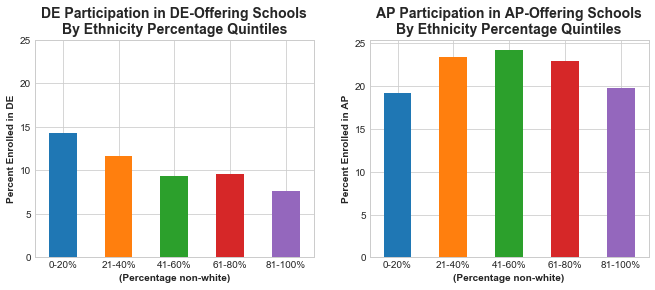

In [87]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (11,4))

plt.sca(ax1)
de_eth.plot.bar(x='eth_quintile', y='de_pct_enrolled', ax = ax1)
plt.legend([])
plt.title('DE Participation in DE-Offering Schools\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.yticks(np.arange(0,30,5))
plt.xlabel('(Percentage non-white)')
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_eth.plot.bar(x='eth_quintile', y='ap_pct_enrolled', ax=ax2)
plt.legend([])
plt.title('AP Participation in AP-Offering Schools\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.yticks(np.arange(0,30,5))
plt.xlabel('(Percentage non-white)')
plt.ylabel('Percent Enrolled in AP')
plt.show()

### -- By Size

In [88]:
deOffering_size_total = crdc_1516_deYes.groupby('size_group')['hs_total_enrollment'].sum().reset_index()
de_size_enrollment = crdc_1516_deYes.groupby('size_group')['de_total_enrollment'].sum().reset_index()
de_size = de_size_enrollment.merge(deOffering_size_total, how = 'inner', on = 'size_group')

de_size['de_pct_enrolled'] = round(de_size['de_total_enrollment'] / de_size['hs_total_enrollment'] * 100, 1)
%store -r hs_by_size
de_size_with_flag_pct = de_size.merge(hs_by_size, on = 'size_group')

de_size_with_flag_pct['pct_de'] = de_size_with_flag_pct['pct_de'] * 100
de_size_with_flag_pct = de_size_with_flag_pct[['size_group', 'de_pct_enrolled', 'pct_de']]
de_size_with_flag_pct = de_size_with_flag_pct.rename({'de_pct_enrolled': "DE Participation %",
                               'pct_de': '% of Schools in Size Group Offering DE',
                                'size_group': 'size_group (number of students)'}, axis = 1)

de_size_with_flag_pct = de_size_with_flag_pct.set_index("size_group (number of students)").rename({1: '<100',
                                                                              2: '100-499',
                                                                              3:'500-1199',
                                                                              4:'1200+'}).reset_index()

In [89]:
apOffering_size_total = crdc_1516_apYes.groupby('size_group')['hs_total_enrollment'].sum().reset_index()
ap_size_enrollment = crdc_1516_apYes.groupby('size_group')['ap_total_enrollment'].sum().reset_index()
ap_size = ap_size_enrollment.merge(apOffering_size_total, how = 'inner', on = 'size_group')

ap_size['ap_pct_enrolled'] = round(ap_size['ap_total_enrollment'] / ap_size['hs_total_enrollment'] * 100, 1)
%store -r ap_by_size
ap_size_with_flag_pct = ap_size.merge(ap_by_size, on = 'size_group')

ap_size_with_flag_pct['pct_ap'] = ap_size_with_flag_pct['pct_ap'] * 100
ap_size_with_flag_pct = ap_size_with_flag_pct[['size_group', 'ap_pct_enrolled', 'pct_ap']]
ap_size_with_flag_pct = ap_size_with_flag_pct.rename({'ap_pct_enrolled': "AP Participation %",
                               'pct_ap': '% of Schools in Size Group Offering AP',
                                'size_group': 'size_group (number of students)'}, axis = 1)

ap_size_with_flag_pct = ap_size_with_flag_pct.set_index("size_group (number of students)").rename({1: '<100',
                                                                              2: '100-499',
                                                                              3:'500-1199',
                                                                              4:'1200+'}).reset_index()

In [90]:
display(de_size_with_flag_pct.merge(ap_size_with_flag_pct, on = 'size_group (number of students)'))
print('Reads like: ' + str(de_size_with_flag_pct.at[0, 'DE Participation %'])
   + '% of all high school students in high schools with ' + str(de_size_with_flag_pct.at[0, 'size_group (number of students)']) 
   + ' students (and that offer DE) are enrolled in DE Courses, and '
   + str(de_size_with_flag_pct.at[0, '% of Schools in Size Group Offering DE']) + '% of the high schools in that Size Group'
   + ' Offer DE.' + ' ------------ (Same Pattern for AP)')

,size_group (number of students),DE Participation %,% of Schools in Size Group Offering DE,AP Participation %,% of Schools in Size Group Offering AP
0,<100,19.1,56.0,17.1,14.0
1,100-499,17.2,71.0,16.8,55.0
2,500-1199,11.7,75.0,18.4,89.0
3,1200+,8.9,77.0,23.8,98.0


Reads like: 19.1% of all high school students in high schools with <100 students (and that offer DE) are enrolled in DE Courses, and 56.00000000000001% of the high schools in that Size Group Offer DE. ------------ (Same Pattern for AP)


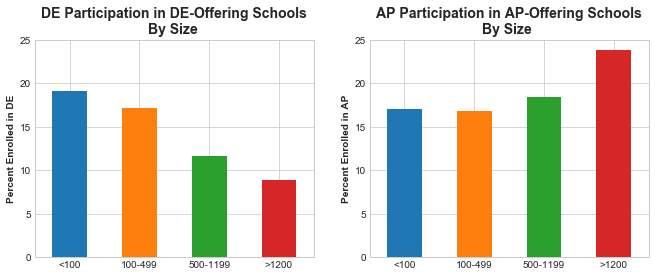

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11,4))

plt.sca(ax1)
de_size.plot.bar(x = 'size_group', y = 'de_pct_enrolled', ax=ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('DE Participation in DE-Offering Schools\nBy Size ')
plt.yticks(np.arange(0,30,5))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_size.plot.bar(x = 'size_group', y = 'ap_pct_enrolled', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('AP Participation in AP-Offering Schools\nBy Size ')
plt.yticks(np.arange(0,30,5))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylabel('Percent Enrolled in AP')
plt.show()

## State

In [92]:
deOffering_state_total = crdc_1516_deYes.groupby('LEA_STATE')['hs_total_enrollment'].sum().reset_index()
de_state_enrollment = crdc_1516_deYes.groupby('LEA_STATE')['de_total_enrollment'].sum().reset_index()
de_state = de_state_enrollment.merge(deOffering_state_total, how = 'inner', on = 'LEA_STATE')

In [93]:
de_state['de_pct_enrolled'] = round(de_state['de_total_enrollment'] / de_state['hs_total_enrollment'] * 100, 1)
%store -r de_by_state_pcts
de_state_with_flag_pct = de_state.merge(de_by_state_pcts, on='LEA_STATE')
de_state_with_flag_pct['pct'] = de_state_with_flag_pct['pct'] * 100
de_state_with_flag_pct = de_state_with_flag_pct.rename({'pct': '% of Schools in State Offering DE',
                                                       'de_pct_enrolled': 'DE Participation %'}, axis=1) \
                                               .set_index('LEA_STATE')

In [94]:
apOffering_state_total = crdc_1516_apYes.groupby('LEA_STATE')['hs_total_enrollment'].sum().reset_index()
ap_state_enrollment = crdc_1516_apYes.groupby('LEA_STATE')['ap_total_enrollment'].sum().reset_index()
ap_state = ap_state_enrollment.merge(apOffering_state_total, how = 'inner', on = 'LEA_STATE')

In [95]:
ap_state['ap_pct_enrolled'] = round(ap_state['ap_total_enrollment'] / ap_state['hs_total_enrollment'] * 100, 1)
%store -r ap_by_state_pcts
ap_state_with_flag_pct = ap_state.merge(ap_by_state_pcts, on='LEA_STATE')
ap_state_with_flag_pct['pct'] = ap_state_with_flag_pct['pct'] * 100
ap_state_with_flag_pct = ap_state_with_flag_pct.rename({'pct': '% of Schools in State Offering AP',
                                                       'ap_pct_enrolled': 'AP Participation %'}, axis=1) \
                                                .set_index('LEA_STATE')

In [96]:
display(pd.concat([de_state_with_flag_pct, ap_state_with_flag_pct], axis = 1))
print('Reads Like: ' + str(de_state_with_flag_pct.at['AK', 'DE Participation %'])
      + '% of high school students in AK' + ' schools (that offer ' 
      + 'Dual Enrollment) are enrolled in DE Courses, and '
      + str(de_state_with_flag_pct.at['AK', '% of Schools in State Offering DE']) + '% of the high schools in that state'
      + ' Offer Dual Enrollment. -- Same Pattern for AP')

,de_total_enrollment,hs_total_enrollment,DE Participation %,% of Schools in State Offering DE,ap_total_enrollment,hs_total_enrollment,AP Participation %,% of Schools in State Offering AP
LEA_STATE,,,,,,,,
AK,2120,22963,9.2,40.0,4308,26828,16.1,17.0
AL,11002,188556,5.8,84.0,31166,178366,17.5,64.0
AR,13636,98965,13.8,77.0,30370,126940,23.9,93.0
AZ,31460,215207,14.6,45.0,51166,272329,18.8,48.0
CA,34746,660474,5.3,34.0,425288,1714293,24.8,81.0
CO,19233,221649,8.7,80.0,53962,220964,24.4,64.0
CT,15329,108358,14.1,64.0,33033,149492,22.1,83.0
DC,71,2955,2.4,21.0,4183,14614,28.6,97.0
DE,1820,28577,6.4,69.0,6595,33481,19.7,83.0


Reads Like: 9.2% of high school students in AK schools (that offer Dual Enrollment) are enrolled in DE Courses, and 40.0% of the high schools in that state Offer Dual Enrollment. -- Same Pattern for AP


**Visualizations**

In [97]:
de_data = dict(type = 'choropleth',
            locations = de_state['LEA_STATE'],
            locationmode = 'USA-states',
            z = de_state['de_pct_enrolled'])

de_layout = dict(title = 'DE Participation Percentages in High Schools',
    geo = {'scope':'usa'})

de_choromap = go.Figure(data = [de_data], layout = de_layout)

iplot(de_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

In [98]:
ap_data = dict(type = 'choropleth',
            locations = ap_state['LEA_STATE'],
            locationmode = 'USA-states',
            z = ap_state['ap_pct_enrolled'])

ap_layout = dict(title = 'AP Participation Percentages in High Schools',
    geo = {'scope':'usa'})

ap_choromap = go.Figure(data = [ap_data], layout = ap_layout)

iplot(ap_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

## Region

In [99]:
deOffering_region_total = crdc_1516_deYes.groupby('region_accred')['hs_total_enrollment'].sum().reset_index()
de_region_enrollment = crdc_1516_deYes.groupby('region_accred')['de_total_enrollment'].sum().reset_index()
de_region = de_region_enrollment.merge(deOffering_region_total, how = 'inner', on = 'region_accred')

de_region['de_pct_enrolled'] = round(de_region['de_total_enrollment'] / de_region['hs_total_enrollment'] * 100, 1)
%store -r de_by_region_accred
de_region_with_flag_pct = de_region.merge(de_by_region_accred, on = 'region_accred')[['region_accred', 'de_pct_enrolled', 'pct_de']]
de_region_with_flag_pct['pct_de'] = de_region_with_flag_pct['pct_de'] * 100
de_region_with_flag_pct = de_region_with_flag_pct.rename({'de_pct_enrolled': 'DE Participation %', 
                                                          'pct_de': '% of Schools in Region Offering DE'}, axis = 1)

In [100]:
apOffering_region_total = crdc_1516_apYes.groupby('region_accred')['hs_total_enrollment'].sum().reset_index()
ap_region_enrollment = crdc_1516_apYes.groupby('region_accred')['ap_total_enrollment'].sum().reset_index()
ap_region = ap_region_enrollment.merge(apOffering_region_total, how = 'inner', on = 'region_accred')

ap_region['ap_pct_enrolled'] = round(ap_region['ap_total_enrollment'] / ap_region['hs_total_enrollment'] * 100, 1)
%store -r ap_by_region_accred
ap_region_with_flag_pct = ap_region.merge(ap_by_region_accred, on = 'region_accred')[['region_accred', 'ap_pct_enrolled', 'pct_ap']]
ap_region_with_flag_pct['pct_ap'] = ap_region_with_flag_pct['pct_ap'] * 100
ap_region_with_flag_pct = ap_region_with_flag_pct.rename({'ap_pct_enrolled': 'AP Participation %', 
                                                          'pct_ap': '% of Schools in Region Offering AP'}, axis = 1)

In [101]:
display(de_region_with_flag_pct.merge(ap_region_with_flag_pct, on = 'region_accred'))
print('Reads like: ' + str(de_region_with_flag_pct.at[0, 'DE Participation %'])
   + '% of all high school students in ' + str(de_region_with_flag_pct.at[0, 'region_accred']) + ' schools (that offer ' 
   + 'DE) are enrolled in DE Courses, and '
   + str(de_region_with_flag_pct.at[0, '% of Schools in Region Offering DE']) + '% of the high schools in that Region'
   + ' Offer DE.' + ' ------------ (Same Pattern for AP)')

,region_accred,DE Participation %,% of Schools in Region Offering DE,AP Participation %,% of Schools in Region Offering AP
0,HLC,13.5,78.0,20.0,57.0
1,MSCHE,11.5,56.0,21.0,82.0
2,NEASC,7.7,57.0,19.9,83.0
3,NWCCU,19.0,63.0,20.8,52.0
4,SACS,8.4,85.0,22.5,76.0
5,WASC,5.3,36.0,24.5,81.0


Reads like: 13.5% of all high school students in HLC schools (that offer DE) are enrolled in DE Courses, and 78.0% of the high schools in that Region Offer DE. ------------ (Same Pattern for AP)


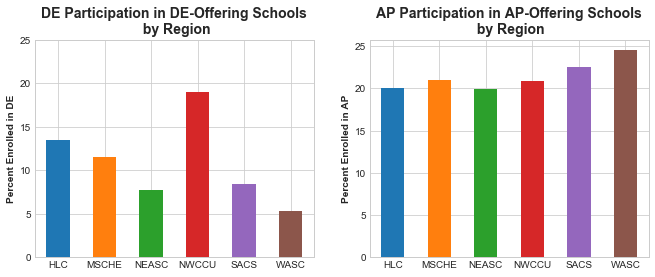

In [102]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (11,4))

plt.sca(ax1)
de_region_with_flag_pct.plot.bar(x='region_accred', y='DE Participation %', ax=ax1)
plt.title('DE Participation in DE-Offering Schools\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,30,5))
plt.xlabel('')
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_region_with_flag_pct.plot.bar(x='region_accred', y='AP Participation %', ax=ax2)
plt.title('AP Participation in AP-Offering Schools\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,26,5))
plt.xlabel('')
plt.ylabel('Percent Enrolled in AP')
plt.show()